# Predicting Success of Kickstarter Projects

## Data Cleaning

### Project Setup

In [220]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps
import matplotlib.style as msty
import matplotlib.patches as mpatches

In [221]:
ROOT = os.getcwd() + '/'

In [222]:
rawdf = pd.read_csv(ROOT + 'kickstarter_projects.csv')

In [223]:
class Pandops:
    """Simplify pandas operations to view or retrieve data"""

    def series_by_value(df: pd.DataFrame, col: str, value: str):
        return df[df[col] == value]
    
    def return_value_counts(df: pd.DataFrame, col: str):
        return df[col].value_counts()
    
    def new_step(df: pd.DataFrame):
        return df.copy()
    
    def print_unique(df: pd.DataFrame, col: str):
        print(df[col].unique(), df[col].nunique())
        

In [224]:
rawdf.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15      US        100.0   
2  2013-01-12 00:20:50    220.0    failed        3      US        220.0   
3  2012-03-17 03:24:11      1.0    failed        1      US          1.0   
4  2015-07-04 08:35:03   1283.0  canceled       14      US       1283.0   

   usd_pledged_real  usd_goal_real  
0               0.0        1533.95  
1            2421.0       30000.00  
2             220.0       45000.00  
3               1.0        5000.00  
4            1283.0       19500.00

## EDA

### General Feature

In [225]:
# There's a total of 378,661 datapoints / projects in this dataset
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [226]:
# 4 project names are missing which is fine since we're assuming there's no value to be extracted from it
# There a handful of usd pledged missing - these items could be removed since there's so much data available.
rawdf.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [227]:
# For each feature we can see how many unique values are present. There's 5 categorical, 2 datetime, 6 numerical
for col_name in rawdf.columns:
    print(col_name, rawdf[col_name].nunique())

ID 378661
name 375764
category 159
main_category 15
currency 14
deadline 3164
goal 8353
launched 378089
pledged 62130
state 6
backers 3963
country 23
usd pledged 95455
usd_pledged_real 106065
usd_goal_real 50339


In [228]:
Pandops.return_value_counts(rawdf, 'main_category')

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [229]:
temp = Pandops.return_value_counts(rawdf, 'category')

In [230]:
temp[temp <= 1000][50:]

Literary Journals    278
Textiles             276
Couture              275
Blues                268
Animals              255
Fabrication Tools    250
Makerspaces          238
Printing             238
Movie Theaters       232
Puzzles              231
Bacon                221
Stationery           219
Photo                196
Video Art            194
Romance              190
Knitting             181
Workshops            164
Crochet              162
Translations         153
Pet Fashion          139
Glass                138
Latin                137
Embroidery           113
Typography           108
Pottery              100
Weaving               93
Quilts                81
Residencies           69
Letterpress           49
Chiptune              35
Literary Spaces       27
Taxidermy             13
Name: category, dtype: int64

In [231]:
Pandops.return_value_counts(rawdf, 'currency')

USD    295365
GBP     34132
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64

In [232]:
Pandops.return_value_counts(rawdf, 'state')

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [233]:
Pandops.return_value_counts(rawdf, 'country')

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [234]:
round(rawdf.describe(), 0)

ID         goal     pledged   backers  usd pledged  \
count  3.786610e+05     378661.0    378661.0  378661.0     374864.0   
mean   1.074731e+09      49081.0      9683.0     106.0       7037.0   
std    6.190862e+08    1183391.0     95636.0     907.0      78640.0   
min    5.971000e+03          0.0         0.0       0.0          0.0   
25%    5.382635e+08       2000.0        30.0       2.0         17.0   
50%    1.075276e+09       5200.0       620.0      12.0        395.0   
75%    1.610149e+09      16000.0      4076.0      56.0       3034.0   
max    2.147476e+09  100000000.0  20338986.0  219382.0   20338986.0   

       usd_pledged_real  usd_goal_real  
count          378661.0       378661.0  
mean             9059.0        45454.0  
std             90973.0      1152950.0  
min                 0.0            0.0  
25%                31.0         2000.0  
50%               624.0         5500.0  
75%              4050.0        15500.0  
max          20338986.0    166361391.0

In [235]:
print('launched date range')
print(rawdf['launched'].min())
print(rawdf['launched'].max())
print()
print('deadline date range')
print(rawdf['deadline'].min())
print(rawdf['deadline'].max())

launched date range
1970-01-01 01:00:00
2018-01-02 15:02:31

deadline date range
2009-05-03
2018-03-03


#### Takeaway - General
=> Null values are present in 'usd pledged' - will be removed

=> 'Undefined' or similar missing values are present in country, and state - will be removed

=> In 'launch date' there appears to be outliers present. Since kickstarter was founded in 2009, there's definitely
   some incorrect dates present

=> 'launch date' and 'deadline' can be converted into a duration

=> 'category' has 159 unique values. This would not translate well for a machine learning model, since each value of a
   categorical variable would become a dimension, which could limit generalization of the model. Furthermore, many of
   the 'category' values have low representation - will need to thoroughly investigate

=> 'usd pledged' and 'usd_pledged_real' along with 'goal' and 'usd_goal_real' needs to be investigated to see which
   would be better used in the model, considering they represent the same information

=> 'currency' and 'country' appear to have nearly identical values, and represent the same information;
   except country breaks the 'EUR' currency into the different countries of Europe. Considering the low representation
   of the individual countries, country will be dropped as a feature.

=> There is low representation in some currencies on Kickstarter - I could convert these into an "Other" category or 
   completely remove them - they could add potential noise to the dataset.


#### Removing null values

In [236]:
# In this head view, it's clear that when the country = 'N,0"':
# state = 'undefined', backers=0 and usd pledged=NaN
Pandops.series_by_value(rawdf, 'country', 'N,0"').head()

ID                                       name      category  \
169  1000694855              STREETFIGHTERZ WHEELIE MURICA  Film & Video   
328   100149523                Duncan Woods - Chameleon EP         Music   
632  1003023003  The Making of Ashley Kelley's Debut Album         Music   
647  1003130892               Butter Side Down Debut Album         Music   
749  1003629045                    Chase Goehring debut EP         Music   

    main_category currency    deadline    goal             launched  pledged  \
169  Film & Video      USD  2014-09-20  6500.0  2014-08-06 21:28:36   555.00   
328         Music      AUD  2015-08-25  4500.0  2015-08-04 12:05:17  4767.00   
632         Music      USD  2015-04-09  3500.0  2015-03-10 20:06:13  3576.00   
647         Music      USD  2015-11-26  6000.0  2015-11-02 22:09:19  7007.80   
749         Music      USD  2016-03-21  3000.0  2016-02-23 03:09:49  3660.38   

         state  backers country  usd pledged  usd_pledged_real  usd_goal_real  
169  undefined        0    N,0"          NaN            555.00        6500.00  
328  undefined        0    N,0"          NaN           3402.08        3211.53  
632  undefined        0    N,0"          NaN           3576.00        3500.00  
647  undefined        0    N,0"          NaN           7007.80        6000.00  
749  undefined        0    N,0"          NaN           3660.38        3000.00

In [237]:
undefdf = Pandops.series_by_value(rawdf, 'state', 'undefined')

In [238]:
Pandops.print_unique(undefdf, 'backers')

[0] 1


In [239]:
Pandops.print_unique(undefdf, 'country')

['N,0"'] 1


In [240]:
Pandops.print_unique(undefdf, 'usd pledged')

[nan] 0


In [241]:
# Confirming all 'Undefined' values in state have no backers, all have the N'0" value for country, and 0 usd pledged.

In [242]:
print(undefdf['launched'].min())
print(undefdf['launched'].max())

2012-03-14 19:05:44
2016-04-20 03:14:49


In [243]:
print(undefdf['deadline'].min())
print(undefdf['deadline'].max())

2012-04-24
2016-06-09


In [244]:
# The dates appear to occur between 2012-2016. Could be a Kickstarter side issue, however, these points are not needed
# and will all be removed.

In [245]:
drop_locs1 = list(Pandops.series_by_value(rawdf, 'state', 'undefined').index)

In [246]:
drop_locs1[:10]

[169, 328, 632, 647, 749, 824, 844, 864, 870, 890]

In [247]:
s1 = rawdf.drop(drop_locs1)

In [248]:
# There appears to be more NaN values, and N,0" values present.
s1[s1['usd pledged'].isnull()].head()

ID                                         name category  \
2457  1012744036    An Oratorio for our Time - Last Stop Cafe    Music   
4338  1022254171   Help OrphanSporks Record Our Fourth Album!    Music   
4892  1024989802             Jackson Ruby: The Cassette Album    Music   
5353  1027275369  Help Parker Brown make his first solo album    Music   
5597  1028691308    Help BETHANY record a NEW single in Nash!    Music   

     main_category currency    deadline    goal             launched  pledged  \
2457         Music      USD  2016-05-26  5000.0  2016-04-26 19:46:26  5170.00   
4338         Music      USD  2016-05-14  2500.0  2016-04-11 07:20:59  1375.00   
4892         Music      USD  2016-05-11  5000.0  2016-04-11 19:29:17  5296.00   
5353         Music      USD  2016-05-21  3800.0  2016-04-21 16:14:28  5077.00   
5597         Music      USD  2016-05-08  3500.0  2016-04-04 23:32:00  3502.13   

           state  backers country  usd pledged  usd_pledged_real  \
2457  successful        0    N,0"          NaN           5170.00   
4338    canceled        0    N,0"          NaN           1375.00   
4892  successful        0    N,0"          NaN           5296.00   
5353  successful        0    N,0"          NaN           5077.00   
5597  successful        0    N,0"          NaN           3502.13   

      usd_goal_real  
2457         5000.0  
4338         2500.0  
4892         5000.0  
5353         3800.0  
5597         3500.0

In [249]:
# At locations where usd pledged = Nan, all 235 data points that have 0 backers
s1[s1['usd pledged'].isnull()]['backers'].value_counts()

0    235
Name: backers, dtype: int64

In [250]:
# At locations where usd pledged = NaN, all 235 data points that have country = N'0"
s1[s1['usd pledged'].isnull()]['country'].value_counts()

N,0"    235
Name: country, dtype: int64

In [251]:
# Confirming there are no longer undefined values in the dataset
s1[s1['usd pledged'].isnull()]['state'].value_counts()

successful    105
failed        105
canceled       22
suspended       2
live            1
Name: state, dtype: int64

In [252]:
# Removing datapoints that has usd pledged = NaN
drop_locs2 = list(s1[s1['usd pledged'].isnull()].index)

In [253]:
s1 = s1.drop(drop_locs2)

In [254]:
s1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374864 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                374864 non-null  int64  
 1   name              374860 non-null  object 
 2   category          374864 non-null  object 
 3   main_category     374864 non-null  object 
 4   currency          374864 non-null  object 
 5   deadline          374864 non-null  object 
 6   goal              374864 non-null  float64
 7   launched          374864 non-null  object 
 8   pledged           374864 non-null  float64
 9   state             374864 non-null  object 
 10  backers           374864 non-null  int64  
 11  country           374864 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  374864 non-null  float64
 14  usd_goal_real     374864 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 45.8+ MB


In [255]:
# Still 4 null values for the name, but it's currently irrelevant.
s1.isnull().sum() 

ID                  0
name                4
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

### Defining the target variable: 'state'

=> 'State' is the endpoint for this dataset, since it contains information on whether a Kickstarter project is
   sucessful. "Successful" projects will be projects that are categorized as successful - which is determined on a
   variety of factors and is not tied to solely one or two variables.  (ie, just because the amount pledged does not
   reach a goal does not necessarily mean that the project failed)
   
=> This model will have k=2 classes: successful or failed.

=> The following transformations will occur:
   => state = 'live'      -> These values will be removed, since they are not classified as either failed or
                             successful. I intend to see if these can be predicted as a failure / success when the
                             model is trained
                            
   => state = 'canceled'  -> This value leans more towards 'failed' as a state, since it did not see completion. The
                             goal of this model is to predict whether a project is successful or not. As a result,
                             this value will be converted into 'failed'
                             
   => state = 'suspended' -> 'Suspended' is ambigiuous on what the meaning actually is. It could be suspended in terms
                             of 'punishment' for malpractice, or it could be suspended in the sense that it was 
                             ongoing, currently not ongoing, but there is a chance for it to continue. This value
                             will be removed

In [256]:
Pandops.return_value_counts(s1, 'state')

failed        197614
successful    133851
canceled       38757
live            2798
suspended       1844
Name: state, dtype: int64

In [257]:
# Converting 'canceled' into 'failed'
s1['state'] = s1['state'].replace(to_replace='canceled', value='failed')

# Dropping 'live'
drop_live = Pandops.series_by_value(s1, 'state', 'live').index
s1 = s1.drop(drop_live)

drop_suspended = Pandops.series_by_value(s1, 'state', 'suspended').index
s1 = s1.drop(drop_suspended)

In [258]:
# Confirming that the only state we're left with is successful and failed
Pandops.return_value_counts(s1, 'state')

failed        236371
successful    133851
Name: state, dtype: int64

In [259]:
s2 = Pandops.new_step(s1)

### Converting 'deadline' and 'launched' into duration

In [260]:
# deadline and launched are originally present as a 'object' datatype. Converting it to date time will allow 
# operations to be performed
s2['deadline'] = pd.to_datetime(s2['deadline'])

# Removing the 'time' in launched before converting to datetime. Need to convert to datetime, remove the time
# which converts back into an object, and re-convert into datetime
s2['launched'] = pd.to_datetime(s2['launched'])
s2['launched'] =  s2['launched'].dt.date
s2['launched'] = pd.to_datetime(s2['launched'])

In [261]:
s2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370222 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                370222 non-null  int64         
 1   name              370219 non-null  object        
 2   category          370222 non-null  object        
 3   main_category     370222 non-null  object        
 4   currency          370222 non-null  object        
 5   deadline          370222 non-null  datetime64[ns]
 6   goal              370222 non-null  float64       
 7   launched          370222 non-null  datetime64[ns]
 8   pledged           370222 non-null  float64       
 9   state             370222 non-null  object        
 10  backers           370222 non-null  int64         
 11  country           370222 non-null  object        
 12  usd pledged       370222 non-null  float64       
 13  usd_pledged_real  370222 non-null  float64       
 14  usd_

In [262]:
# Creating a new feature 'duration'

# Creates a difference of dates in days, in the datetime datatype
s2['days_active'] = s2['deadline'] - s2['launched']

# Converting the days from a date time, into int
s2['days_active'] = s2['days_active'].dt.days

In [263]:
s2.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency   deadline     goal   launched  \
0          Poetry    Publishing      GBP 2015-10-09   1000.0 2015-08-11   
1  Narrative Film  Film & Video      USD 2017-11-01  30000.0 2017-09-02   
2  Narrative Film  Film & Video      USD 2013-02-26  45000.0 2013-01-12   
3           Music         Music      USD 2012-04-16   5000.0 2012-03-17   
4    Film & Video  Film & Video      USD 2015-08-29  19500.0 2015-07-04   

   pledged   state  backers country  usd pledged  usd_pledged_real  \
0      0.0  failed        0      GB          0.0               0.0   
1   2421.0  failed       15      US        100.0            2421.0   
2    220.0  failed        3      US        220.0             220.0   
3      1.0  failed        1      US          1.0               1.0   
4   1283.0  failed       14      US       1283.0            1283.0   

   usd_goal_real  days_active  
0        1533.95           59  
1       30000.00           60  
2       45000.00           45  
3        5000.00           30  
4       19500.00           56

In [264]:
s2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370222 entries, 0 to 378660
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                370222 non-null  int64         
 1   name              370219 non-null  object        
 2   category          370222 non-null  object        
 3   main_category     370222 non-null  object        
 4   currency          370222 non-null  object        
 5   deadline          370222 non-null  datetime64[ns]
 6   goal              370222 non-null  float64       
 7   launched          370222 non-null  datetime64[ns]
 8   pledged           370222 non-null  float64       
 9   state             370222 non-null  object        
 10  backers           370222 non-null  int64         
 11  country           370222 non-null  object        
 12  usd pledged       370222 non-null  float64       
 13  usd_pledged_real  370222 non-null  float64       
 14  usd_

In [265]:
s3 = Pandops.new_step(s2)

### Removing the 'country' feature

In [266]:
Pandops.return_value_counts(s3, 'country')

US    289671
GB     33215
CA     14508
AU      7681
DE      4057
FR      2873
NL      2807
IT      2775
ES      2204
SE      1718
MX      1632
NZ      1425
DK      1083
IE       793
CH       736
NO       694
BE       597
AT       576
HK       564
SG       521
LU        61
JP        31
Name: country, dtype: int64

In [267]:
s3 = s3.drop('country', axis=1)

In [268]:
s3.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency   deadline     goal   launched  \
0          Poetry    Publishing      GBP 2015-10-09   1000.0 2015-08-11   
1  Narrative Film  Film & Video      USD 2017-11-01  30000.0 2017-09-02   
2  Narrative Film  Film & Video      USD 2013-02-26  45000.0 2013-01-12   
3           Music         Music      USD 2012-04-16   5000.0 2012-03-17   
4    Film & Video  Film & Video      USD 2015-08-29  19500.0 2015-07-04   

   pledged   state  backers  usd pledged  usd_pledged_real  usd_goal_real  \
0      0.0  failed        0          0.0               0.0        1533.95   
1   2421.0  failed       15        100.0            2421.0       30000.00   
2    220.0  failed        3        220.0             220.0       45000.00   
3      1.0  failed        1          1.0               1.0        5000.00   
4   1283.0  failed       14       1283.0            1283.0       19500.00   

   days_active  
0           59  
1           60  
2           45  
3           30  
4           56

### Creating an 'Other' value for currency

In [269]:
# USD is the most represented, followed by mostly english currencies. There are a couple distinct groupings here
# but all the currencies below 'AUD' will be grouped into other
Pandops.return_value_counts(s3, 'currency')

USD    289671
GBP     33215
EUR     16743
CAD     14508
AUD      7681
SEK      1718
MXN      1632
NZD      1425
DKK      1083
CHF       736
NOK       694
HKD       564
SGD       521
JPY        31
Name: currency, dtype: int64

In [270]:
conv_other = Pandops.return_value_counts(s3, 'currency').index[5:].to_list()

In [271]:
s3['currency'] = s3['currency'].replace(conv_other, 'Other')

In [272]:
Pandops.return_value_counts(s3, 'currency')

USD      289671
GBP       33215
EUR       16743
CAD       14508
Other      8404
AUD        7681
Name: currency, dtype: int64

In [273]:
s4 = Pandops.new_step(s3)

### 'main_category' and 'category'

In [274]:
mc_list = Pandops.return_value_counts(s4, 'main_category')
mc_list

Film & Video    62248
Music           49101
Publishing      39014
Games           34720
Technology      31761
Design          29515
Art             27863
Food            24263
Fashion         22424
Theater         10850
Comics          10720
Photography     10675
Crafts           8661
Journalism       4671
Dance            3736
Name: main_category, dtype: int64

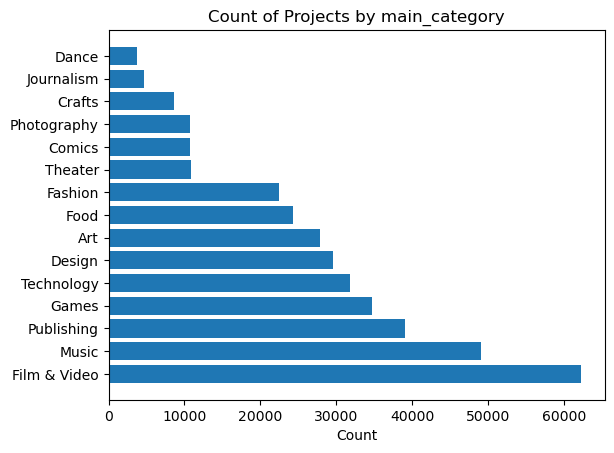

In [275]:
plt.yticks(np.arange(len(mc_list)), list(mc_list.index))
plt.barh(np.arange(len(mc_list)), mc_list)
plt.title("Count of Projects by main_category")
plt.xlabel('Count')
plt.show()

#### main_category Takeaways

=> Many of the art based categories seem to be less popular projects to kickstart

=> All categories have fairly high representation, with 'Dance' being the lowest with 3767,  with 'Journalism' not 
   far behind
   
=> Depending on distribution of subcategories, we may just drop the individual categories, and stick with the main
   categories in order to generalize better

In [276]:
# Determining how many categories fall under each main_category
for mc in list(s4.main_category.unique()):
    print(mc, "{}".format(("." * (20 - len(mc)))) ,s4[s4['main_category'] == mc]['category'].nunique())

Publishing .......... 18
Film & Video ........ 20
Music ............... 19
Food ................ 13
Design .............. 7
Crafts .............. 15
Games ............... 8
Comics .............. 6
Fashion ............. 9
Theater ............. 8
Art ................. 13
Photography ......... 7
Technology .......... 16
Dance ............... 5
Journalism .......... 6


In [277]:
# Initiating a dataframe in order to derive summary statistics from
cat_perc = pd.DataFrame(columns=['main_category', 'category', '%success', '%fail','%ofmain', 'count'])

In [278]:
for mc in list(s4.main_category.unique()):
    mcdf    = s4[s4['main_category'] == mc]
    main_cat_count = mcdf.shape[0]
    subcats = list(mcdf['category'].unique())
    
    for cat in subcats:
        cdf       = mcdf[mcdf['category'] == cat]
        cat_count = cdf.shape[0] # Count of the category
        csuc      = cdf[cdf['state'] == 'successful'].shape[0] / cat_count # Percentage of the category that succeeded
        cfail     = cdf[cdf['state'] == 'failed'].shape[0] / cat_count # Percentage of the category that failed
        cofmain   = cat_count / main_cat_count # Percentage of the category of the main_category 
        
        cat_perc.loc[len(cat_perc.index)] = [mc, cat, csuc, cfail, cofmain, cat_count]

In [279]:
# More categories than orginially suspected - since category names can be repeated under different main categories
# ie. 'comedy' exists in both 'film' and 'theater'
cat_perc.shape

(170, 6)

In [280]:
cat_perc.head()

main_category    category  %success     %fail   %ofmain  count
0    Publishing      Poetry  0.358352  0.641648  0.034834   1359
1    Publishing  Nonfiction  0.270008  0.729992  0.211693   8259
2    Publishing   Art Books  0.510927  0.489073  0.068027   2654
3    Publishing     Fiction  0.245196  0.754804  0.233429   9107
4    Publishing  Publishing  0.300807  0.699193  0.139745   5452

In [281]:
# Determining the most frequent category in each main_category, and the success rate
for cat in cat_perc['main_category'].unique():
    temp = Pandops.series_by_value(cat_perc, 'main_category', cat)
    
    max_per_cat = Pandops.series_by_value(temp, 'count', temp['count'].max())
    
    print(max_per_cat[['category', 'count', '%success']])
    
    print(list(temp[temp['count'] == temp['count'].max()]['category']),temp['count'].max())

    print(list(temp[temp['count'] == temp['count'].max()]['%success']))
    print()

  category  count  %success
3  Fiction   9107  0.245196
['Fiction'] 9107
[0.24519600307455802]

       category  count  %success
20  Documentary  16065  0.368752
['Documentary'] 16065
[0.36875194522253346]

   category  count  %success
38    Music  13208  0.480012
['Music'] 13208
[0.48001211387038156]

   category  count  %success
58     Food  11395  0.289337
['Food'] 11395
[0.28933742869679685]

          category  count  %success
70  Product Design  21886  0.363749
['Product Design'] 21886
[0.3637485150324408]

   category  count  %success
77   Crafts   4603  0.252444
['Crafts'] 4603
[0.2524440582228981]

          category  count  %success
93  Tabletop Games  14036  0.560416
['Tabletop Games'] 14036
[0.5604160729552579]

    category  count  %success
101   Comics   4973  0.503921
['Comics'] 4973
[0.5039211743414438]

    category  count  %success
106  Fashion   8474  0.258202
['Fashion'] 8474
[0.258201557705924]

    category  count  %success
115  Theater   7036  0.626066
['Theater'

In [282]:
# Determining the most frequent category in each main_category, and the success rate
max_cats = pd.DataFrame(columns=cat_perc.columns)
for cat in cat_perc['main_category'].unique():
    temp = Pandops.series_by_value(cat_perc, 'main_category', cat)    
    max_per_cat = Pandops.series_by_value(temp, 'count', temp['count'].max())
    max_cats = pd.concat((max_cats, max_per_cat), axis=0)    
    print('Added...{}'.format(cat))



Added...Publishing
Added...Film & Video
Added...Music
Added...Food
Added...Design
Added...Crafts
Added...Games
Added...Comics
Added...Fashion
Added...Theater
Added...Art
Added...Photography
Added...Technology
Added...Dance
Added...Journalism


In [283]:
max_cats[['main_category','category', 'count', '%success']].sort_values('%success', ascending=False)

main_category        category  count  %success
159         Dance           Dance   2314  0.666379
115       Theater         Theater   7036  0.626066
93          Games  Tabletop Games  14036  0.560416
101        Comics          Comics   4973  0.503921
38          Music           Music  13208  0.480012
125           Art             Art   8155  0.415083
20   Film & Video     Documentary  16065  0.368752
70         Design  Product Design  21886  0.363749
136   Photography     Photography   5729  0.327457
58           Food            Food  11395  0.289337
166    Journalism      Journalism   1717  0.274898
106       Fashion         Fashion   8474  0.258202
77         Crafts          Crafts   4603  0.252444
3      Publishing         Fiction   9107  0.245196
148    Technology      Technology   6742  0.195343

In [284]:
# A common trend among the values above is that many of them are redundancies with the main_category name - definitely
# something to consider when working with these variables

In [285]:
# Determining which categories are present in several main_categories
(Pandops.return_value_counts(cat_perc, 'category') > 1)[:10]

Comedy           True
Spaces           True
Anthologies      True
Web              True
Letterpress      True
Events           True
Experimental     True
Festivals        True
Musical         False
Plays           False
Name: category, dtype: bool

In [286]:
# Returning indexes of duplicate categories
rep_cats = (Pandops.return_value_counts(cat_perc, 'category') > 1)[:8].index

In [287]:
# Returning duplicate categories and the main category
cat_perc[cat_perc['category'].isin(rep_cats)].sort_values('category')

main_category      category  %success     %fail   %ofmain  count
8      Publishing   Anthologies  0.586022  0.413978  0.009535    372
102        Comics   Anthologies  0.753731  0.246269  0.037500    402
14     Publishing        Comedy  0.347222  0.652778  0.001845     72
122       Theater        Comedy  0.635417  0.364583  0.008848     96
25   Film & Video        Comedy  0.391866  0.608134  0.033575   2090
55          Music        Comedy  0.411765  0.588235  0.000346     17
64           Food        Events  0.170079  0.829921  0.026172    635
105        Comics        Events  0.320513  0.679487  0.014552    156
35   Film & Video  Experimental  0.271719  0.728281  0.008691    541
117       Theater  Experimental  0.573370  0.426630  0.033917    368
34   Film & Video     Festivals  0.466899  0.533101  0.004611    287
116       Theater     Festivals  0.591575  0.408425  0.050323    546
84         Crafts   Letterpress  0.675676  0.324324  0.004272     37
17     Publishing   Letterpress  0.600000  0.400000  0.000256     10
65           Food        Spaces  0.293144  0.706856  0.017434    423
121       Theater        Spaces  0.466981  0.533019  0.019539    212
161         Dance        Spaces  0.369231  0.630769  0.052195    195
146    Technology           Web  0.067258  0.932742  0.120777   3836
168    Journalism           Web  0.151764  0.848236  0.260972   1219

In [288]:
# Many of the duplicate categories have very low representation. This will be okay, and it will be possible to
# make them distinct values. These duplicate categories need to be clarified because an "Food Event" project is 
# significantly different than "Comic Event" and if the distinction isn't made, the model will learn the "event"
# category as a single feature, rather than treating "comic event" and "food event" as two seperate entities

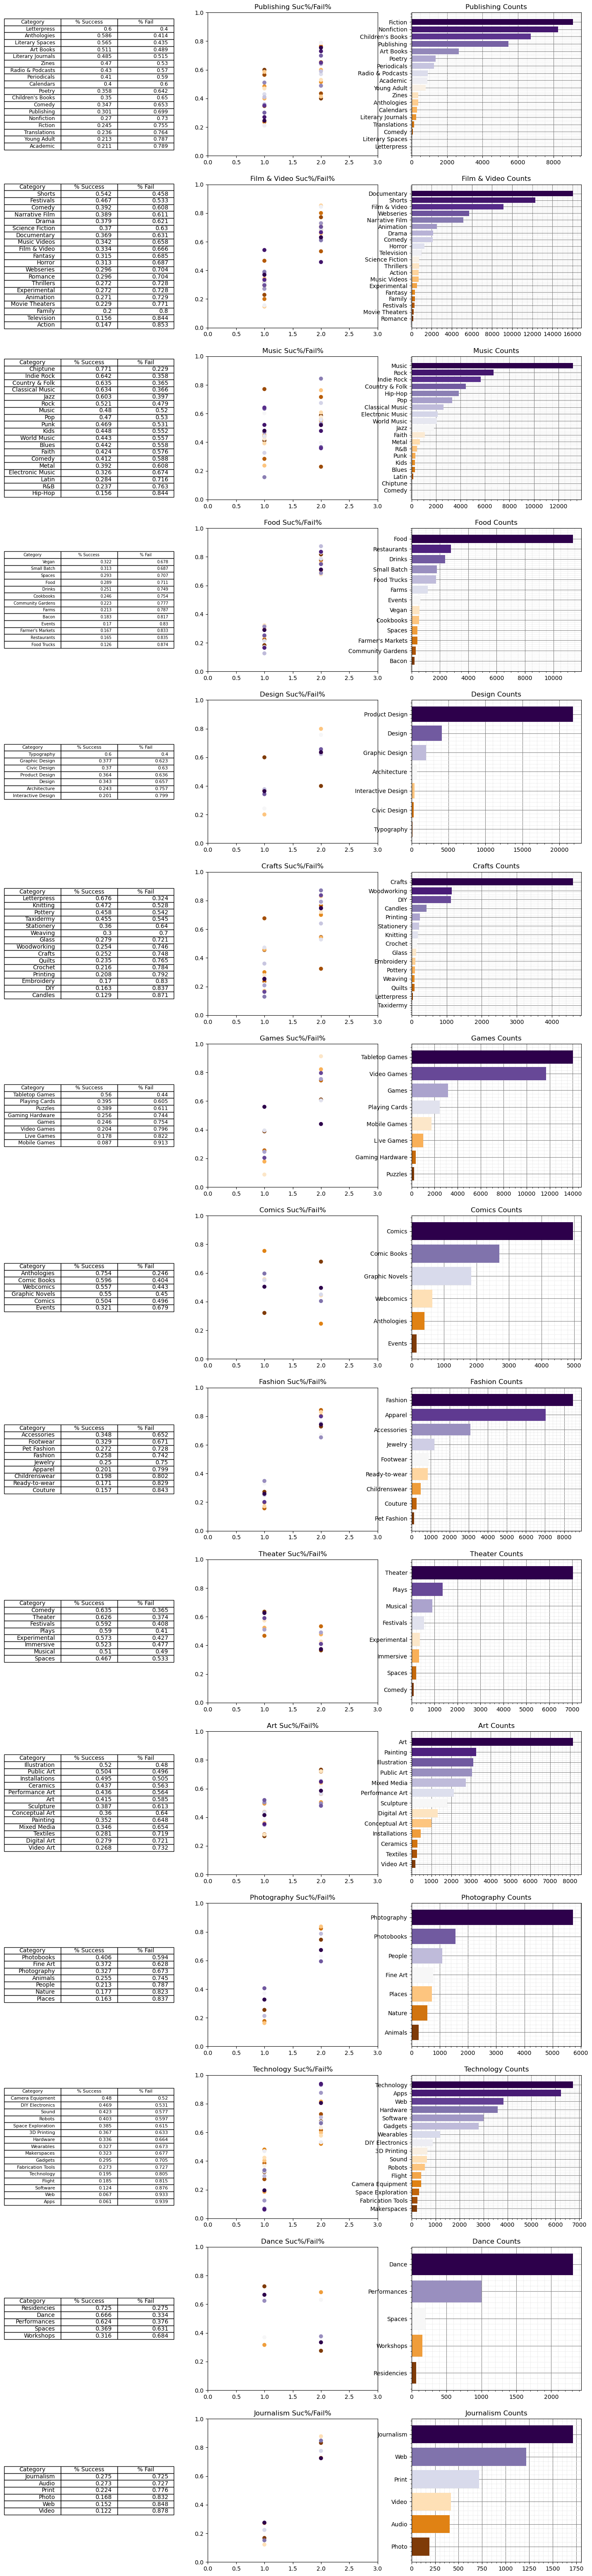

In [289]:
# Visualizing how categories perform to see if there's any clustering and help determine how to 
# reduce the categories

fig, axs = plt.subplots(cat_perc['main_category'].nunique(), 3, figsize=(18,80))
i = 0
for mc in cat_perc.main_category.unique():
    mcdf = round(cat_perc[cat_perc['main_category'] == mc], 3)
    mcdf = mcdf.sort_values('count')
    color = np.arange(mcdf.shape[0])
    vir = plt.get_cmap('PuOr', mcdf.shape[0])
    
    suc  = list(mcdf['%success'])
    fail = list(mcdf['%fail'])

    axs[i,0].axis('off')
    axs[i,0].axis('tight')
    axs[i,0].table(cellText=mcdf[['category', '%success', '%fail']].sort_values('%success', ascending=False).values, 
                   colLabels=['Category', '% Success', '% Fail'],
                   loc='center')
    
    axs[i,1].set_title(mc + ' Suc%/Fail%')
    axs[i,1].set_xlim(0,3)
    axs[i,1].set_ylim(0,1)
    axs[i,1].scatter([1] * len(suc), suc, c=color , cmap='PuOr')
    axs[i,1].scatter([2] * len(fail), fail, c=color, cmap='PuOr')
    
    axs[i,2].set_title(mc + ' Counts')
    axs[i,2].grid(which='major', color='gray', linestyle='-')
    axs[i,2].grid(which='minor', color='lightgray', linestyle='dotted', alpha=0.9)
    axs[i,2].minorticks_on()
    axs[i,2].set_axisbelow(True)
    axs[i,2].barh(np.arange(mcdf.shape[0]), list(mcdf['count']), color=vir(color))
    axs[i,2].set_yticks(np.arange(mcdf.shape[0]), list(mcdf['category']))

    i+=1
    
plt.show()

#### 'main_category' and 'category' Takeaways

=> The largest represented group in many of these subcategories may be a repeat of the main category without further specification

=> Many categories have very low representation relative to others. Originally, I was planning to make an "Other" category, however, there is already a category that repeats the main category, which essentially acts as an "Other" or a better way of stating it is "General". Items that would go into the other group will be placed in the general category, and for foresight, this general category will be removed later on when building the model.
   
=> For some categories such as food, we see fairly tight clusters and trend, which means we can combine it into a single main category, and don't need an additional category.

=> The following processing for each main category will be performed:

   => Publishing
      - Categories with less than 1000 datapoints will be combined
      
   => Film & Video
      - Categories with less than  800 datapoints will be combined
   
   => Music
      - Categories with less than 1000 datapoints will be combined
   
   => Food
      - Categories with less than 1000 datapoints will be combined
   
   => Design
      - All categories will be combined except 'Product Design' and 'Graphic Design'
   
   => Crafts
      - All categories will be combined except 'DIY' and 'Woodworking'
   
   => Games
      - Categories with less than 1500 datapoints will be combined
   
   => Comics
      - All categories will be combined except 'Graphic Novels' and 'Comic Books'
   
   => Fashion
      - All categories will be combined except 'Accessories' and 'Apparel'
   
   => Theater
      - All categories will be combined except 'Plays'
   
   => Art
      - Categories with less than 1100 datapoints will be combined
      
   => Photography
      - All categories with less than 1000 data points will be combined
      
   => Technology
      - All categories with less than 1000 data points will be combined
   
   => Dance
      - All categoreies will be combined except "Performances"
      
   => Journalism
      - All categories will be combined

In [290]:
cat_perc[cat_perc['category'].isin(rep_cats)].sort_values('main_category')

main_category      category  %success     %fail   %ofmain  count
105        Comics        Events  0.320513  0.679487  0.014552    156
102        Comics   Anthologies  0.753731  0.246269  0.037500    402
84         Crafts   Letterpress  0.675676  0.324324  0.004272     37
161         Dance        Spaces  0.369231  0.630769  0.052195    195
25   Film & Video        Comedy  0.391866  0.608134  0.033575   2090
34   Film & Video     Festivals  0.466899  0.533101  0.004611    287
35   Film & Video  Experimental  0.271719  0.728281  0.008691    541
64           Food        Events  0.170079  0.829921  0.026172    635
65           Food        Spaces  0.293144  0.706856  0.017434    423
168    Journalism           Web  0.151764  0.848236  0.260972   1219
55          Music        Comedy  0.411765  0.588235  0.000346     17
17     Publishing   Letterpress  0.600000  0.400000  0.000256     10
14     Publishing        Comedy  0.347222  0.652778  0.001845     72
8      Publishing   Anthologies  0.586022  0.413978  0.009535    372
146    Technology           Web  0.067258  0.932742  0.120777   3836
116       Theater     Festivals  0.591575  0.408425  0.050323    546
117       Theater  Experimental  0.573370  0.426630  0.033917    368
121       Theater        Spaces  0.466981  0.533019  0.019539    212
122       Theater        Comedy  0.635417  0.364583  0.008848     96

#### Fixing the duplicate 'category' values above

This can be accomplished by appending the corresponding 'main_category' with the 'category'. For example, instead of having: 

main_category   category
Journalism      Web
Technology      Web

It would look like
main_category   category
Journalism      Journalism_Web
Technology      Technology_Web

In [291]:
s5 = Pandops.new_step(s4)

In [292]:
dup_df = cat_perc[cat_perc['category'].isin(rep_cats)].sort_values('main_category')
update_list = []

for n in dup_df['main_category'].unique():
    for m in dup_df[dup_df['main_category'] == n]['category'].unique():
        update_list.append(n+'_'+m)
        s5.loc[(s5['main_category'] == n) & (s5['category'] == m), 'category'] = n+'_'+m

In [293]:
# There should be 11 new categories based off this transformation
cat_perc[cat_perc['category'].isin(rep_cats)].sort_values('category')

main_category      category  %success     %fail   %ofmain  count
8      Publishing   Anthologies  0.586022  0.413978  0.009535    372
102        Comics   Anthologies  0.753731  0.246269  0.037500    402
14     Publishing        Comedy  0.347222  0.652778  0.001845     72
122       Theater        Comedy  0.635417  0.364583  0.008848     96
25   Film & Video        Comedy  0.391866  0.608134  0.033575   2090
55          Music        Comedy  0.411765  0.588235  0.000346     17
64           Food        Events  0.170079  0.829921  0.026172    635
105        Comics        Events  0.320513  0.679487  0.014552    156
35   Film & Video  Experimental  0.271719  0.728281  0.008691    541
117       Theater  Experimental  0.573370  0.426630  0.033917    368
34   Film & Video     Festivals  0.466899  0.533101  0.004611    287
116       Theater     Festivals  0.591575  0.408425  0.050323    546
84         Crafts   Letterpress  0.675676  0.324324  0.004272     37
17     Publishing   Letterpress  0.600000  0.400000  0.000256     10
65           Food        Spaces  0.293144  0.706856  0.017434    423
121       Theater        Spaces  0.466981  0.533019  0.019539    212
161         Dance        Spaces  0.369231  0.630769  0.052195    195
146    Technology           Web  0.067258  0.932742  0.120777   3836
168    Journalism           Web  0.151764  0.848236  0.260972   1219

In [294]:
# Total number of data points that will have the category chanfe
sum(cat_perc[cat_perc['category'].isin(rep_cats)]['count'])

11514

In [295]:
# There should be 11 new categories based off this transformation since it's adding n-1 new variables per category
print(s4.category.nunique())
print(s5.category.nunique())

159
170


In [296]:
# Verifying the change occurred correctly. There are 11514 points changed, as expected.
s5[s5['category'].isin(update_list)]

ID                                               name  \
71      1000261018  Diposta - liberating people from their postal ...   
77      1000294559                              Secular Solstice 2014   
85      1000335422                         "Where is Home?" Anthology   
117     1000491057                                         AllThis TV   
135     1000558429                   Sellegg start up classified site   
...            ...                                                ...   
378544   999387668          How To Create a WordPress Website In 2017   
378561   999477658                       Cidery Tasting Room Buildout   
378581   999576487                                          FluXPanel   
378619   999780798                                   Green City Times   
378632    99984851                                           "Loreto"   

                   category main_category currency   deadline      goal  \
71           Technology_Web    Technology      USD 2016-08-23  100000.0   
77        Theater_Festivals       Theater      USD 2014-10-27    7500.0   
85       Comics_Anthologies        Comics      CAD 2014-07-10    4000.0   
117     Film & Video_Comedy  Film & Video      USD 2017-04-09   50000.0   
135          Technology_Web    Technology      USD 2016-03-20   15000.0   
...                     ...           ...      ...        ...       ...   
378544       Technology_Web    Technology      CAD 2017-09-14     500.0   
378561          Food_Spaces          Food      USD 2017-09-09   10000.0   
378581       Technology_Web    Technology    Other 2015-04-18   50000.0   
378619       Journalism_Web    Journalism      USD 2016-08-28    5000.0   
378632  Film & Video_Comedy  Film & Video      USD 2014-06-05   12000.0   

         launched   pledged       state  backers  usd pledged  \
71     2016-07-24    141.00      failed        3       100.00   
77     2014-10-02   8157.01  successful      164      8157.01   
85     2014-06-10   4944.50  successful      153      4523.37   
117    2017-03-10     40.00      failed        3        20.00   
135    2016-03-02     25.00      failed        1        25.00   
...           ...       ...         ...      ...          ...   
378544 2017-08-25    311.00      failed       16       127.54   
378561 2017-08-25  10746.00  successful       98      1710.00   
378581 2015-03-19      3.00      failed        1         2.19   
378619 2016-07-29     11.00      failed        3         0.00   
378632 2014-05-06      0.00      failed        0         0.00   

        usd_pledged_real  usd_goal_real  days_active  
71                141.00      100000.00           30  
77               8157.01        7500.00           25  
85               4646.65        3759.05           30  
117                40.00       50000.00           30  
135                25.00       15000.00           18  
...                  ...            ...          ...  
378544            256.24         411.96           20  
378561          10746.00       10000.00           15  
378581              2.27       37832.93           30  
378619             11.00        5000.00           30  
378632              0.00       12000.00           30  

[11514 rows x 15 columns]

#### Reducing categories

In [297]:
s6 = Pandops.new_step(s5)

In [298]:
# Publishing
# Categories with less than 1000 datapoints will be combined

tbr1 = ['Radio & Podcasts', 'Academic', 'Young Adult', 'Zines', 'Publishing_Anthologies', 'Calendars', 
        'Literary Journals', 'Translations', 'Publishing_Comedy', 'Literary Spaces','Publishing_Letterpress']
s6['category'] = s6['category'].replace(tbr1, 'Publishing')


# Film & Video
# Categories with less than  800 datapoints will be combined
   
tbr2 = ['Science Fiction', 'Thrillers', 'Action', 'Music Videos', 'Film & Video_Experimental', 'Fantasy', 'Family',
       'Film & Video_Festivals', 'Movie Theaters', 'Romance']
s6['category'] = s6['category'].replace(tbr2, 'Film & Video')
    
# Music
# Categories with less than 1000 datapoints will be combined
   
tbr3 = ['Metal', 'R&B', 'Punk', 'Kids', 'Blues', 'Latin', 'Chiptune', 'Music_Comedy']
s6['category'] = s6['category'].replace(tbr3, 'Music')


# Food
# Categories with less than 1000 datapoints will be combined

tbr4 = ['Food_Events', 'Vegan', 'Cookbooks', 'Food_Spaces', "Farmer's Markets", 'Community Gardens', 'Bacon']
s6['category'] = s6['category'].replace(tbr4, 'Food')
   
# Design
# All categories will be combined except 'Product Design' and 'Graphic Design'
   
tbr5 = ['Architecture','Interactive Design', 'Civic Design', 'Typography']
s6['category'] = s6['category'].replace(tbr5, 'Design')
    
# Crafts
# All categories will be combined except 'DIY' and 'Woodworking'

tbr6 = ['Candles', 'Printing', 'Stationery', 'Knitting', 'Crochet', 'Glass', 'Embroidery', 'Pottery', 'Weaving',
       'Quilts', 'Crafts_Letterpress', 'Taxidermy']
s6['category'] = s6['category'].replace(tbr6, 'Crafts')
    
# Games
# Categories with less than 1500 datapoints will be combined
   
tbr7 = ['Games', 'Playing Cards', 'Mobile Games', 'Live Games', 'Gaming Hardware', 'Puzzles']
s6['category'] = s6['category'].replace(tbr7, 'Games')
    
# Comics
# All categories will be combined except 'Restaurant' and 'Food Truck'
  
tbr8 = ['Webcomics', 'Comics_Anthologies', 'Comics_Events']
s6['category'] = s6['category'].replace(tbr8, 'Comics')

# Fashion
# All categories will be combined except 'Accessories' and 'Apparel'
  
tbr9 = ['Jewelry', 'Footwear', 'Ready-to-wear', 'Childrenswear', 'Couture', 'Pet Fashion']
s6['category'] = s6['category'].replace(tbr9, 'Fashion')

# Theater
# All categories will be combined except 'Plays'
  
tbr10 = ['Musical', 'Theater_Festivals', 'Theater_Experimental', 'Immersive', 'Theater_Spaces', 'TheaterComedy']
s6['category'] = s6['category'].replace(tbr10, 'Theater')

# Art
# All categories will be combined except "Public Art", "Illustration", "Public Art", and "Digital Art"

tbr11 = ['Conceptual Art', 'Installations', 'Ceramics', 'Textiles', 'Video Art']
s6['category'] = s6['category'].replace(tbr11, 'Art')

# Photography
# All categories with less than 1000 data points will be combined
      
tbr12 = ['Fine Art', 'Places', 'Nature', 'Animals']
s6['category'] = s6['category'].replace(tbr12, 'Photography')
    
# Technology
# All categories with less than 1000 data points will be combined
   
tbr13 = ['DIY Electronics', '3D Printing', 'Sound', 'Robots', 'Flight', 'Camera Equipment', 'Space Exploration',
       'Fabrication Tools', 'Makerspaces']
s6['category'] = s6['category'].replace(tbr13, 'Technology')
    
# Dance
# All categoreies will be combined except "Performances"

tbr14 = ['Dance_Spaces', 'Workshops', 'Residencies']
s6['category'] = s6['category'].replace(tbr14, 'Performance')
    
# Journalism
# All categories will be combined except 'Web'

tbr15 = ['Print', 'Video', 'Audio', 'Photo']
s6['category'] = s6['category'].replace(tbr15, 'Journalism')

In [299]:
print('Total Categories_Old: {}'.format(s5.category.nunique()))
print('Total Categories_New: {}'.format(s6.category.nunique()))
print()
print((19 * ' '), 's5', (5* ' '), 's6')
for i in s6.main_category.unique():
    valn = Pandops.series_by_value(s6, 'main_category',i)['category'].nunique()
    valo = Pandops.series_by_value(s5, 'main_category',i)['category'].nunique()
    
    print(i, (20 - (len(str(valo)) + len(i))) * ' ', valo, 5 * ' ', valn)

Total Categories_Old: 170
Total Categories_New: 75

                    s5       s6
Publishing          18       7
Film & Video        20       10
Music               19       11
Food                13       6
Design               7       3
Crafts              15       3
Games                8       3
Comics               6       3
Fashion              9       3
Theater              8       3
Art                 13       8
Photography          7       3
Technology          16       7
Dance                5       3
Journalism           6       2


In [300]:
# Reduction of nearly 100 categories - should allow the model to generalize better and reduces overfitting

### Currency

In [301]:
s6.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency   deadline     goal   launched  \
0          Poetry    Publishing      GBP 2015-10-09   1000.0 2015-08-11   
1  Narrative Film  Film & Video      USD 2017-11-01  30000.0 2017-09-02   
2  Narrative Film  Film & Video      USD 2013-02-26  45000.0 2013-01-12   
3           Music         Music      USD 2012-04-16   5000.0 2012-03-17   
4    Film & Video  Film & Video      USD 2015-08-29  19500.0 2015-07-04   

   pledged   state  backers  usd pledged  usd_pledged_real  usd_goal_real  \
0      0.0  failed        0          0.0               0.0        1533.95   
1   2421.0  failed       15        100.0            2421.0       30000.00   
2    220.0  failed        3        220.0             220.0       45000.00   
3      1.0  failed        1          1.0               1.0        5000.00   
4   1283.0  failed       14       1283.0            1283.0       19500.00   

   days_active  
0           59  
1           60  
2           45  
3           30  
4           56

In [302]:
Pandops.return_value_counts(s6, 'currency')

USD      289671
GBP       33215
EUR       16743
CAD       14508
Other      8404
AUD        7681
Name: currency, dtype: int64

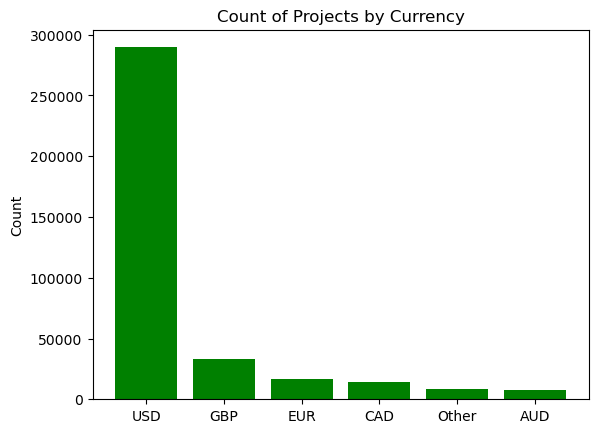

In [303]:
curval = Pandops.return_value_counts(s6, 'currency')

val = list(curval)
lab = list(curval.index)
plt.bar(lab, val, color='green')
plt.title('Count of Projects by Currency')
plt.ylabel('Count')
plt.show()

In [304]:
# There is predominantly projects that take USD, however, there is a significant amount in GBP, EUR, CAD, and AUS

In [305]:
# I also want to see the distribution of the currencies when looking at main_categories to see if certain categories
# are more popular in certain regions

In [306]:
cdf = pd.DataFrame(columns=['currency', 'main_category', 'count', '%total'])

In [307]:
for c in s6.currency.unique():
    temp  = s6[s6['currency'] == c]
    tvc   = temp['main_category'].value_counts()
    val   = list(tvc)
    lab   = list(tvc.index)
    total = temp.shape[0]
    for i in range(len(tvc)):
        cdf.loc[cdf.shape[0]] = [c, lab[i], val[i], (tvc[i] / total) ]

In [308]:
cdf.head()

currency main_category  count    %total
0      GBP  Film & Video   5722  0.172272
1      GBP         Games   3959  0.119193
2      GBP    Publishing   3239  0.097516
3      GBP    Technology   2998  0.090260
4      GBP         Music   2730  0.082192

In [309]:
cdf.shape[0]/6 #Validating that all of the categories exists for each currency

15.0

In [310]:
cdf.main_category.nunique()

15

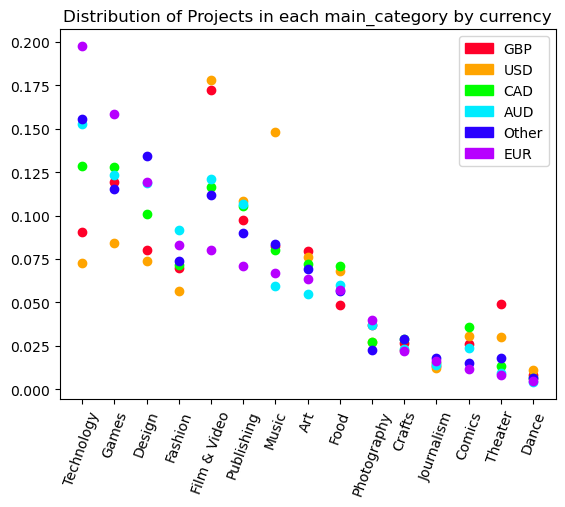

In [311]:
i=0
legendlist = []
for c in cdf['currency'].unique():
    cur_df = cdf[cdf['currency'] == c]
    # lab = lab - Will use the indexes from the last iteration above to compare the distribution
    pos = np.arange(len(lab))
    col = plt.get_cmap('gist_rainbow')
    col_loc = [0, .15, .4, .6, .8, .90]
    
    for p in pos:
        clab = lab[p]
        plt.scatter(p, cur_df[cur_df['main_category'] == clab]['%total'], color=col(col_loc[i]))
    
    legendlist.append(mpatches.Patch(color=col(col_loc[i]), label=c))
    i+=1

plt.xticks(pos, lab, rotation=70)
plt.legend(handles=legendlist)
plt.title('Distribution of Projects in each main_category by currency')
# plt.savefig('greens.png')
# plt.savefig('tab20.png')
plt.show()

#### Disclaimer

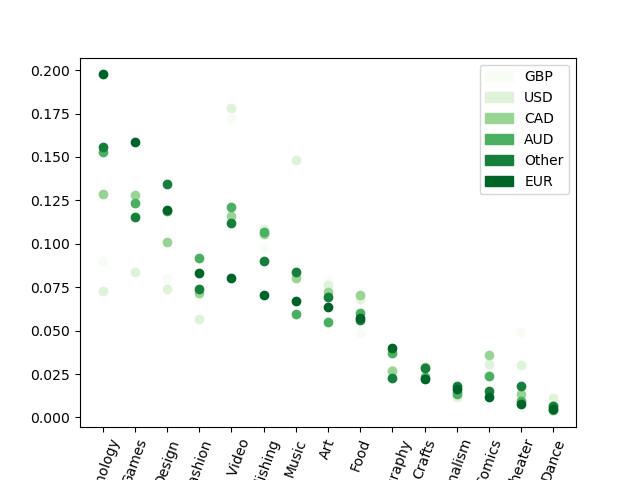

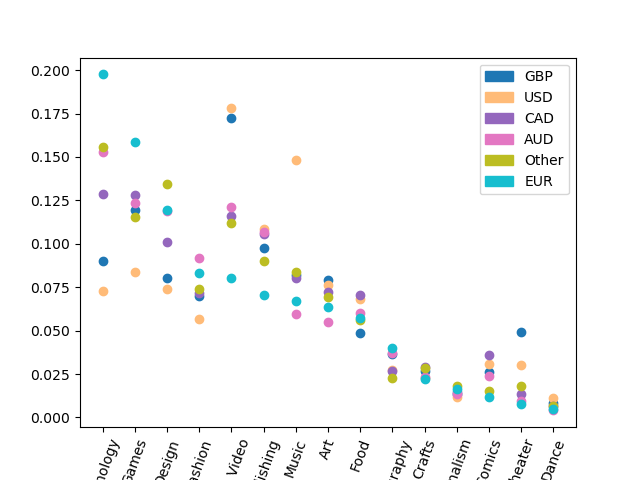

In [312]:
# I initially did not want to make the visual above as colorful as it is and there are several alternative 
# colorschemes I considered. However, the point of this visual is to communicate a message, and when using 
# alternative color schemes, it strains that communication and does not allow for quick, and easy identification 
# of the different categories. Below, I included some alternative color schemes to demonstrate the lack of clarity.
# The 'gist rainbow' scheme above is much easier to interpret in comparison.

from IPython.display import Image, display
import os

cwd = os.getcwd()

display(Image(cwd + '/greens.png'))
display(Image(cwd + '/tab20.png'))

           S     F
GBP    0.363 0.637
USD    0.377 0.623
CAD    0.285 0.715
AUD    0.262 0.738
Other  0.293 0.707
EUR    0.232 0.768


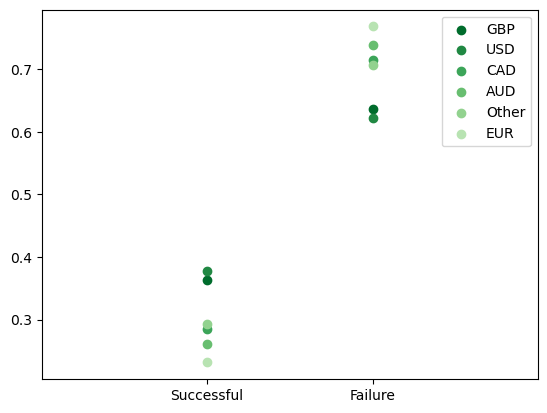

In [313]:
# Visualizing to see the difference in success and failure based on currency

i=0
col  = plt.get_cmap('Greens')
col_loc = np.arange(.3, .99, ((0.99 - .3) / s6.currency.nunique() ))
print(' '* 11 + 'S     F')
for c in s6['currency'].unique():
    
    tempc = Pandops.series_by_value(s6, 'currency', c)
    
    sucp  = Pandops.series_by_value(tempc, 'state', 'successful').shape[0] / tempc.shape[0]
    
    failp = Pandops.series_by_value(tempc, 'state', 'failed').shape[0] / tempc.shape[0]

    print(c, ((5 - len(c))  * ' ') , round(sucp, 3), round(failp, 3)) 
    
    plt.scatter(1, sucp, label=c, color=col(col_loc[-i-1]))
    plt.scatter(2, failp, color=col(col_loc[-i-1]))
    plt.xlim(0,3)
    plt.xticks([1,2], ['Successful', 'Failure'])
    plt.legend()
    
    i+=1

plt.show()

#### Currency Takeaways

This visualization shows how proportionally popular each category is within its respective currency. We see that
for art and the smaller catergories after, they all seem to have fairly low representation across all currencies.
The major trends we see are:

USD
=> "Film and Video" and "Music" tend to occur more with the USD currency

=> "Technology", "Games", "Design", and "Fashion" tend to occur less with USD

GBP
=> "Film and Video" tend to occur more with the GBP currency

=> "Technology" and "Design" tend to occur less with the GBP

=> Compared to other currencies, "Theater" occurs twice as frequently with the GBP currency

EUR
=> "Technology" and "Games" tend to occur more with the EUR currency

=> "Film and Video" and "Publishing" tend to occur less with the EUR currency

When comparing the success and failure rate by currency, we can see that the currency could actually make a difference in whether a project is successful. Projects funded in USD and GBP appear to have a much higher success rate when compared to the other currencies. Speculatively, this may be due to the similar culture between the two regions in comparison to other currencis.

Other than the observances stated above, we see that each main_category occur more or less ubiquitiously with all the currencies. The differences that we do see could be related to cultural and regional preferences. This can be very important when predicting how well a project will do, as the region could tailor how much attention or support a project can receive.

### Deadline and Launched

In [314]:
s7 = Pandops.new_step(s6)

In [315]:
s7.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency   deadline     goal   launched  \
0          Poetry    Publishing      GBP 2015-10-09   1000.0 2015-08-11   
1  Narrative Film  Film & Video      USD 2017-11-01  30000.0 2017-09-02   
2  Narrative Film  Film & Video      USD 2013-02-26  45000.0 2013-01-12   
3           Music         Music      USD 2012-04-16   5000.0 2012-03-17   
4    Film & Video  Film & Video      USD 2015-08-29  19500.0 2015-07-04   

   pledged   state  backers  usd pledged  usd_pledged_real  usd_goal_real  \
0      0.0  failed        0          0.0               0.0        1533.95   
1   2421.0  failed       15        100.0            2421.0       30000.00   
2    220.0  failed        3        220.0             220.0       45000.00   
3      1.0  failed        1          1.0               1.0        5000.00   
4   1283.0  failed       14       1283.0            1283.0       19500.00   

   days_active  
0           59  
1           60  
2           45  
3           30  
4           56

In [316]:
# Converting Datetimes into their individual date components

s7['year_deadline'] = pd.DatetimeIndex(s7['deadline']).year
s7['month_deadline'] = pd.DatetimeIndex(s7['deadline']).month
s7['day_deadline'] = pd.DatetimeIndex(s7['deadline']).day

s7['year_launched'] = pd.DatetimeIndex(s7['launched']).year
s7['month_launched'] = pd.DatetimeIndex(s7['launched']).month
s7['day_launched'] = pd.DatetimeIndex(s7['launched']).day

s7['ym_deadline'] = pd.to_datetime(s7['deadline']).dt.to_period('M')
s7['ym_launched'] = pd.to_datetime(s7['launched']).dt.to_period('M')


In [317]:
s7.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency   deadline     goal   launched  \
0          Poetry    Publishing      GBP 2015-10-09   1000.0 2015-08-11   
1  Narrative Film  Film & Video      USD 2017-11-01  30000.0 2017-09-02   
2  Narrative Film  Film & Video      USD 2013-02-26  45000.0 2013-01-12   
3           Music         Music      USD 2012-04-16   5000.0 2012-03-17   
4    Film & Video  Film & Video      USD 2015-08-29  19500.0 2015-07-04   

   pledged   state  ...  usd_goal_real  days_active  year_deadline  \
0      0.0  failed  ...        1533.95           59           2015   
1   2421.0  failed  ...       30000.00           60           2017   
2    220.0  failed  ...       45000.00           45           2013   
3      1.0  failed  ...        5000.00           30           2012   
4   1283.0  failed  ...       19500.00           56           2015   

   month_deadline  day_deadline  year_launched  month_launched  day_launched  \
0              10             9           2015               8            11   
1              11             1           2017               9             2   
2               2            26           2013               1            12   
3               4            16           2012               3            17   
4               8            29           2015               7             4   

   ym_deadline  ym_launched  
0      2015-10      2015-08  
1      2017-11      2017-09  
2      2013-02      2013-01  
3      2012-04      2012-03  
4      2015-08      2015-07  

[5 rows x 23 columns]

In [318]:
s7[['deadline', 'year_deadline', 'month_deadline', 'day_deadline', 
   'launched', 'year_launched', 'month_launched', 'day_launched', 'ym_launched', 'ym_deadline']].head()

deadline  year_deadline  month_deadline  day_deadline   launched  \
0 2015-10-09           2015              10             9 2015-08-11   
1 2017-11-01           2017              11             1 2017-09-02   
2 2013-02-26           2013               2            26 2013-01-12   
3 2012-04-16           2012               4            16 2012-03-17   
4 2015-08-29           2015               8            29 2015-07-04   

   year_launched  month_launched  day_launched ym_launched ym_deadline  
0           2015               8            11     2015-08     2015-10  
1           2017               9             2     2017-09     2017-11  
2           2013               1            12     2013-01     2013-02  
3           2012               3            17     2012-03     2012-04  
4           2015               7             4     2015-07     2015-08

In [319]:
s7['year_launched'].value_counts().sort_index() #Still items from 1970; needs to be removed; 2018 is negligible and will also be removed

1970        6
2009     1329
2010    10503
2011    26193
2012    41111
2013    44778
2014    66723
2015    74198
2016    56194
2017    49185
2018        2
Name: year_launched, dtype: int64

In [320]:
s7 = s7.drop(s7[s7['year_launched']== 1970].index)
s7 = s7.drop(s7[s7['year_launched']== 2018].index)

In [321]:
s7['year_launched'].value_counts().sort_index()

2009     1329
2010    10503
2011    26193
2012    41111
2013    44778
2014    66723
2015    74198
2016    56194
2017    49185
Name: year_launched, dtype: int64

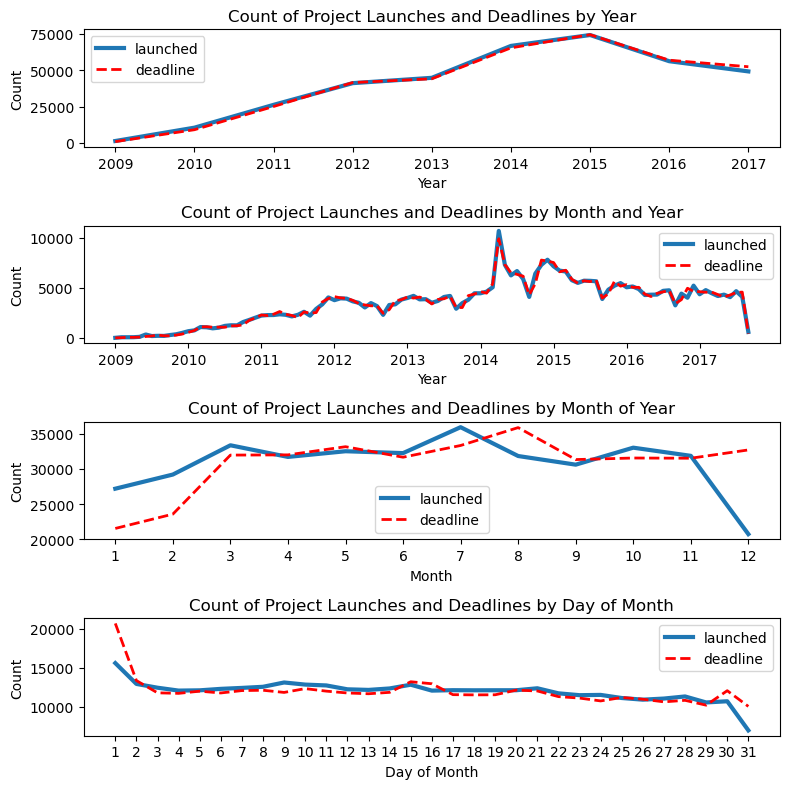

In [322]:
# Visualizing the date components for Deadline and Launched
fig, axs = plt.subplots(4, 1, figsize=(8,8))
plot_items = ['year_launched', 'month_launched', 'day_launched', 'year_deadline', 'month_deadline', 'day_deadline']


yl = s7['year_launched'].value_counts().sort_index()
yd = s7['year_deadline'].value_counts().sort_index()

axs[0].set_title('Count of Project Launches and Deadlines by Year')
axs[0].plot(list(yl), linewidth=3, label='launched')
axs[0].set_xticks(np.arange(yl.shape[0]), yl.index)
axs[0].plot(list(yd[:-1]), linewidth=2, label='deadline', linestyle='dashed', color='red')
axs[0].set_ylabel('Count')
axs[0].set_xlabel('Year')
axs[0].legend()

yml = s7['ym_launched'].value_counts().sort_index()
ymd = s7['ym_deadline'].value_counts().sort_index()

axs[1].set_title('Count of Project Launches and Deadlines by Month and Year')
axs[1].plot(list(yml), linewidth=3, label='launched')
axs[1].set_xticks(list(range(0, 100, 12)), yl.index)
axs[1].plot(list(ymd[:-1]), linewidth=2, label='deadline', linestyle='dashed', color='red')
axs[1].set_ylabel('Count')
axs[1].set_xlabel('Year')
axs[1].legend()


ml = s7['month_launched'].value_counts().sort_index()
md = s7['month_deadline'].value_counts().sort_index()

axs[2].set_title('Count of Project Launches and Deadlines by Month of Year')
axs[2].plot(list(ml), linewidth=3, label='launched')
axs[2].set_xticks(np.arange(ml.shape[0]), ml.index)
axs[2].set_ylabel('Count')
axs[2].set_xlabel('Month')
axs[2].plot(list(md), linewidth=2, label='deadline', linestyle='dashed', color='red')

axs[2].legend()

dl = s7['day_launched'].value_counts().sort_index()
dd = s7['day_deadline'].value_counts().sort_index()

axs[3].set_title('Count of Project Launches and Deadlines by Day of Month')
axs[3].plot(list(dl), linewidth=3, label='launched')
axs[3].set_xticks(np.arange(dl.shape[0]), dl.index)
axs[3].plot(list(dd), linewidth=2, label='deadline', linestyle='dashed', color='red')
axs[3].set_ylabel('Count')
axs[3].set_xlabel('Day of Month')
axs[3].legend()

fig.tight_layout()
plt.show()

In [323]:
# In the year-month scale, there is a clear spike that occurs in 2014
# This period should be analyzed deeper to see what is significant about this peek

In [324]:
y2014 = s7[s7['year_launched'].isin([2014])]
other = s7[~s7['year_launched'].isin([2014])]

In [325]:
# Verifying all data is accounted for

print('y2014 count: ', y2014.shape[0])
print('other count: ', other.shape[0])
print('total: ', sum((y2014.shape[0], other.shape[0])))
print()
print('s7 count: ', s7.shape[0])

y2014 count:  66723
other count:  303491
total:  370214

s7 count:  370214


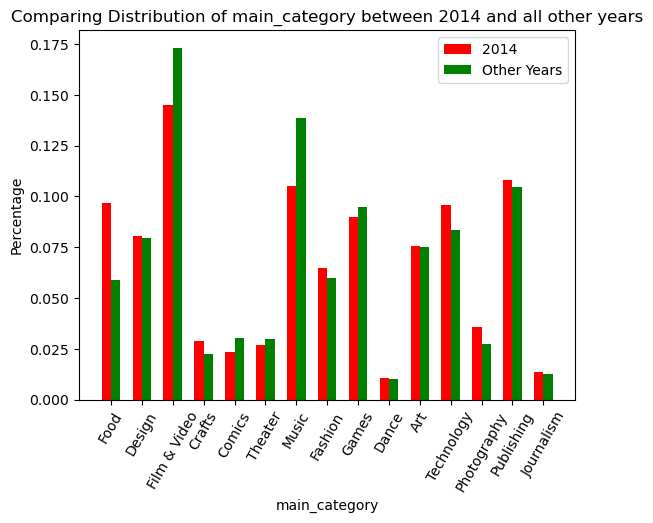

In [326]:
cats = list(y2014['main_category'].unique())
width=0.3


plt.bar(np.arange(len(cats)) - width/ 2, Pandops.return_value_counts(y2014, 'main_category')[cats] / y2014.shape[0], 
        width=width, label='y2014', color='red')

plt.bar(np.arange(len(cats)) + width/ 2, Pandops.return_value_counts(other, 'main_category')[cats] / other.shape[0], 
        width=width, label='other', color='green')

plt.xticks(np.arange(len(cats)), cats, rotation=60)
plt.title('Comparing Distribution of main_category between 2014 and all other years')
plt.xlabel('main_category')
plt.ylabel('Percentage')
plt.legend(['2014', 'Other Years'])
plt.show()

In [327]:
print('2014        Success Rate:',round(y2014[y2014['state'] == 'successful'].shape[0] / y2014.shape[0], 4))
print('Other Years Success Rate:',round(other[other['state'] == 'successful'].shape[0] / other.shape[0], 4))

2014        Success Rate: 0.3163
Other Years Success Rate: 0.3715


In [328]:
# Even though this time period was the most significant for projects launched, there appears to be a significantly
# lower project success rate during this time. 

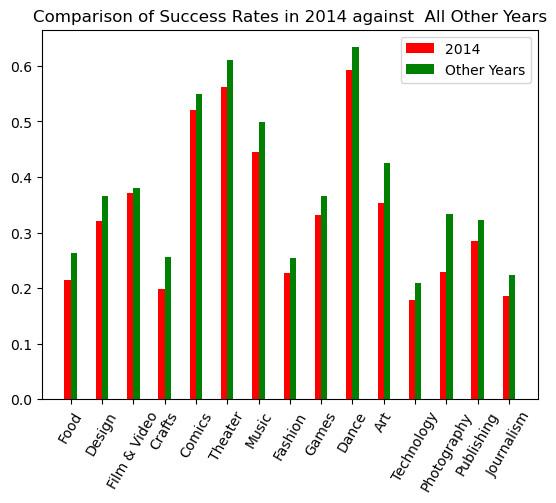

In [329]:
width=0.2

plt.title('Comparison of Success Rates in 2014 against  All Other Years')
plt.bar(np.arange(len(cats)) - width/ 2, y2014[y2014['state']=='successful']['main_category'].value_counts()[cats] / y2014['main_category'].value_counts()[cats], width=width, label='y2014', color='red')
plt.bar(np.arange(len(cats)) + width/ 2, other[other['state']=='successful']['main_category'].value_counts()[cats] / other['main_category'].value_counts()[cats], width=width ,color='green')
plt.xticks(np.arange(15), cats, rotation=60)
plt.legend(['2014', 'Other Years'])
plt.show()

In [330]:
# 2014 is seen to have a lower success rate across all main_categories.
# Analyzing to see if it is a trend that there is a decreasing success rate over the years

In [331]:
ymsl = s7[s7['state'] == 'successful']['ym_launched'].value_counts().sort_index()
ymstot = s7['ym_launched'].value_counts().sort_index()
ymplot = ymsl / ymstot

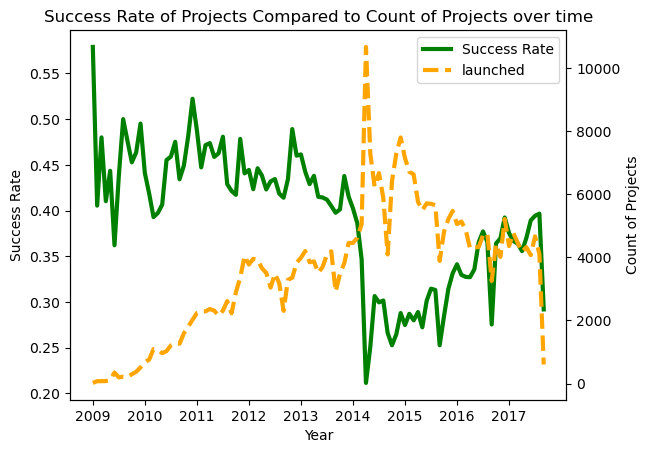

In [332]:
fig, ax = plt.subplots()

ax.set_title('Success Rate of Projects Compared to Count of Projects over time')
a = ax.plot(list(ymplot), linewidth=3,label='Success Rate', color='Green')
ax2 = ax.twinx()

b = ax2.plot(list(yml), linewidth=3, label='launched', linestyle='dashed', color='orange')
ax.set_xticks(list(range(0, 100, 12)), yl.index)

# Creating dual-axis legend
ab = a + b
abl = [i.get_label() for i in ab]


ax2.legend(ab, abl)
ax.set_xlabel('Year')
ax.set_ylabel('Success Rate')
ax2.set_ylabel('Count of Projects', rotation=90)
plt.show()

In [333]:
# We see that leading up to 2014, as the number of project increased leading up to 2014, the success rate stayed 
# rather consistent on a yearly basis, osciliating within the 40-50% success rate, but in 2014 when there is a
# spike up to more than 10000 projects in a month, the result is a drastic drop to a near 20% success rate. 
# Beyond this point, the number of projects decreased and the success rate makes a steady recovery.
# Let's see if the currency has an impact

In [334]:
years = sorted(list(s7.year_launched.unique()))

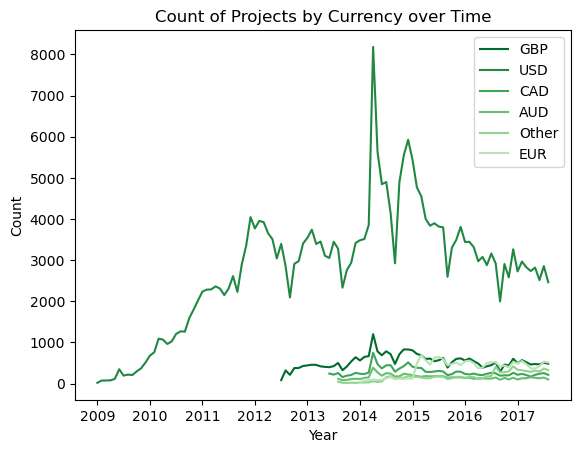

In [335]:
col  = plt.get_cmap('Greens')
col_loc = np.arange(.3, .99, ((0.99 - .3) / s7.currency.nunique() ))
col_loc = col_loc[::-1]

i=0
for c in s7.currency.unique():
    temp  = s7[s7['currency'] == c]
    cplot = list(temp.ym_launched.value_counts().sort_index())
    cplot2 = ([np.nan] * (105 - len(cplot))) + cplot
    plt.plot(cplot2[:-1], label=c, c=col(col_loc[i]))
    
    i+=1


    
tpts = np.arange(0,105,12)

plt.xticks(tpts, yl.index)
plt.title('Count of Projects by Currency over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()
    

In [336]:
tpts = np.arange(0,105,12)
tpts

array([ 0, 12, 24, 36, 48, 60, 72, 84, 96])

In [337]:
# This graph gives us an idea of how the 2014 spike occured. It appeared to be independent of currency used,
# since there is a spike accross all currencies. We also see that Kickstarter originally operated solely in USD, 
# but expanded their operations to GBP in 2012, along with other currencies in 2013. 

In [338]:
# Further investigating the year of the spike. 
Pandops.return_value_counts(y2014, 'ym_launched').sort_index()

2014-01     3472
2014-02     3815
2014-03     4457
2014-04     4456
2014-05     4622
2014-06     5057
2014-07    10671
2014-08     7293
2014-09     6238
2014-10     6672
2014-11     5878
2014-12     4092
Freq: M, Name: ym_launched, dtype: int64

In [339]:
m7y14 = Pandops.series_by_value(y2014, 'month_launched', 7)
other = s7[s7['ym_launched'] != '2014-07' ]

In [340]:
print(m7y14.shape)
print(other.shape)

(10671, 23)
(359543, 23)


In [341]:
m7y14[['goal', 'pledged','goal' ,'backers']].describe([.25, .5,.75, .9, .99])

goal       pledged          goal       backers
count  1.067100e+04  1.067100e+04  1.067100e+04  10671.000000
mean   4.487897e+04  5.206796e+03  4.487897e+04     55.085465
std    1.227504e+06  1.334325e+05  1.227504e+06    716.380035
min    1.000000e+00  0.000000e+00  1.000000e+00      0.000000
25%    1.000000e+03  0.000000e+00  1.000000e+03      0.000000
50%    4.000000e+03  3.500000e+01  4.000000e+03      2.000000
75%    1.250000e+04  7.320000e+02  1.250000e+04     15.000000
90%    4.000000e+04  6.142000e+03  4.000000e+04     81.000000
99%    3.500000e+05  5.625350e+04  3.500000e+05    734.200000
max    9.900000e+07  1.328523e+07  9.900000e+07  62642.000000

In [342]:
other[['goal', 'pledged','goal' ,'backers']].describe([.25, .5, .75, .9, .99])

goal       pledged          goal        backers
count  3.595430e+05  3.595430e+05  3.595430e+05  359543.000000
mean   4.877266e+04  9.885178e+03  4.877266e+04     108.528891
std    1.158183e+06  9.491079e+04  1.158183e+06     920.474194
min    1.000000e-02  0.000000e+00  1.000000e-02       0.000000
25%    2.000000e+03  3.800000e+01  2.000000e+03       2.000000
50%    5.500000e+03  6.700000e+02  5.500000e+03      13.000000
75%    1.700000e+04  4.206500e+03  1.700000e+04      58.000000
90%    5.000000e+04  1.473480e+04  5.000000e+04     171.000000
99%    4.000000e+05  1.375097e+05  4.000000e+05    1542.580000
max    1.000000e+08  2.033899e+07  1.000000e+08  219382.000000

#### Deadline and Launched Takeaway

=> The count of launches and deadlines occur concurrently at the year scale, which makes sense because if a project is launched, then at some point, there will be a deadline.

=> When looking at the month-year scale, it gives a lot more detail on the amount of projects launched. In 2014, there is a spike in the number of  projects launched. When taking a closer look into these years and comparing the main_category proportion to the other years, there are a few differences in representation. In 2014, there is:
    -> ~5%   less Film & Video projects
    -> ~2.5% more Food projects
    -> ~3%   less Music projects

=> Although this time period has 40% of the data points, across all categories, there is overall less successful projects in comparison to other years. When looking at the success rate over all the years, even though there is a substantial increase in the number of projects launched, there is a torrential decrease in success rate of projects. When we compare the counts of projects launched with the success rate, during July 2014, there is a incredible spike in the projects launched, but a equally incredible plummet to counter balance it. One of the differences we see that is likely closely tied to this event is the drastic decrease in backers during the month where 50% of data points have 2 or less backers, while outside this time period, only 25% of projects have 2 or less backers.

=> At the month scale, although close in value, there is a dip in the winter months for projects launched, and substantially more deadlines in december. This could be due to holiday season where individuals may not want to launch a project during holiday season, and for existing projects, the goal is to reach a certain threshold by year-end.

=> At the day scale, there are substantially more deadlines on the first and last day of a month, while project launches seems to be stagnant throughout the month.

### Days Active

In [343]:
s7.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency   deadline     goal   launched  \
0          Poetry    Publishing      GBP 2015-10-09   1000.0 2015-08-11   
1  Narrative Film  Film & Video      USD 2017-11-01  30000.0 2017-09-02   
2  Narrative Film  Film & Video      USD 2013-02-26  45000.0 2013-01-12   
3           Music         Music      USD 2012-04-16   5000.0 2012-03-17   
4    Film & Video  Film & Video      USD 2015-08-29  19500.0 2015-07-04   

   pledged   state  ...  usd_goal_real  days_active  year_deadline  \
0      0.0  failed  ...        1533.95           59           2015   
1   2421.0  failed  ...       30000.00           60           2017   
2    220.0  failed  ...       45000.00           45           2013   
3      1.0  failed  ...        5000.00           30           2012   
4   1283.0  failed  ...       19500.00           56           2015   

   month_deadline  day_deadline  year_launched  month_launched  day_launched  \
0              10             9           2015               8            11   
1              11             1           2017               9             2   
2               2            26           2013               1            12   
3               4            16           2012               3            17   
4               8            29           2015               7             4   

   ym_deadline  ym_launched  
0      2015-10      2015-08  
1      2017-11      2017-09  
2      2013-02      2013-01  
3      2012-04      2012-03  
4      2015-08      2015-07  

[5 rows x 23 columns]

In [344]:
s7.days_active.describe()

count    370214.000000
mean         34.168935
std          12.784898
min           1.000000
25%          30.000000
50%          30.000000
75%          37.000000
max          92.000000
Name: days_active, dtype: float64

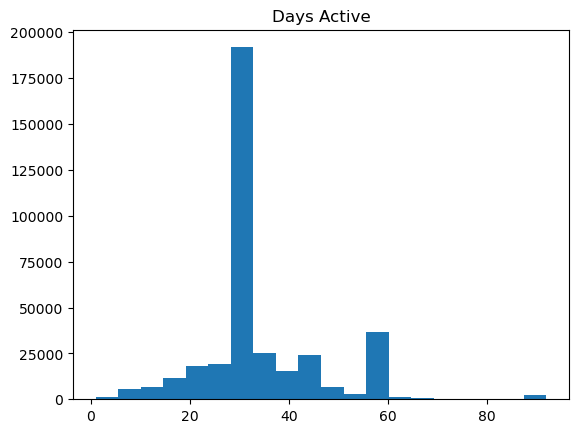

In [345]:
plt.title('Days Active')
plt.hist(s7['days_active'], bins=20)
plt.show()

In [346]:
# There seems to be very clear cutoff dates at the 30, 60, and 90 day mark. It appears that most projects fall within
# a 2 month window. There is a small bar at the 90 day mark, which suggests that it's possible for projects to 
# extend for up to this amount of time, but there could have been a change in policy that reduced the length
# of projects in a particular year, which causes a lower count in this region.

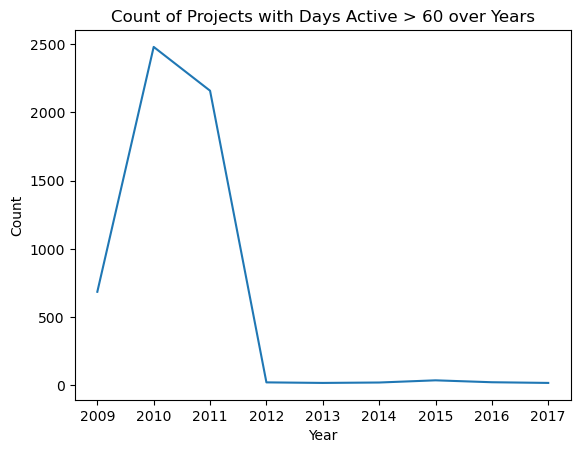

In [347]:
gt60 = Pandops.return_value_counts(s7[s7['days_active'] >= 61], 'year_launched').sort_index()

plt.plot(list(gt60))
plt.xticks(np.arange(len(gt60)), gt60.index)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Projects with Days Active > 60 over Years')
plt.show()

In [348]:
gt60

2009     685
2010    2480
2011    2159
2012      21
2013      17
2014      20
2015      36
2016      22
2017      17
Name: year_launched, dtype: int64

In [349]:
# From the visual above, it's clear that the number of projects that extend beyond 60 days is very limited,
# likely due to a change in policy that prevented projects from being active this long.

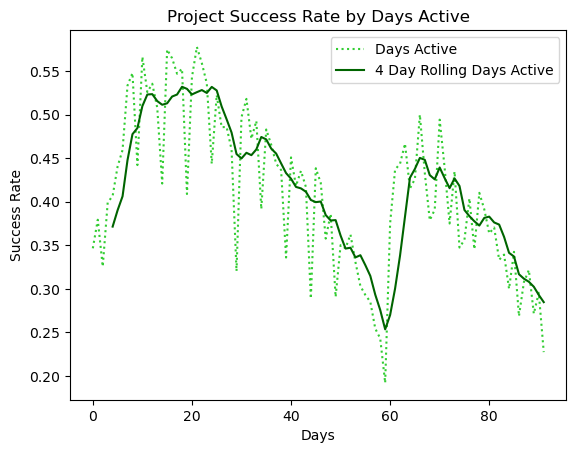

In [350]:
# Comparing the Success and Failure distributions
sda = s7[(s7['state'] == 'successful')]['days_active'].value_counts(bins=list(range(0,100,1))).sort_index() 
sda = Pandops.series_by_value(s7, 'state', 'successful')['days_active'].value_counts(bins=list(range(0,100,1))).sort_index() 

tda = s7['days_active'].value_counts(bins=list(range(0,100,1))).sort_index()

srda = pd.Series(sda/tda)

rsrda = srda.rolling(5).mean()

plt.plot(list(srda),  label='Days Active', linestyle='dotted', color='limegreen')
plt.plot(list(rsrda), label='4 Day Rolling Days Active',color='Darkgreen')
plt.legend()
plt.title('Project Success Rate by Days Active')
plt.xlabel('Days')
plt.ylabel('Success Rate')
plt.show()

#### Days Active Takeaway

=> For days active, there are 3 major time ranges, which are 30, 60, and 90 days. It seems like the 90 day length for projects was depreciated in 2012, since we see a drastic reduction of projects for that length.

=> When looking at the success rate based on days active, the longer a project extends on, the less likely the project will be successful. There is peak proportion of success at approximately 20 days, and from this point, it declines approaching the 30 day point, and subsequently sharply declines approaching the 60 day time point. The number of projects that extend beyond 60 days has a lower sample size, which means the rate above is less reliable, however, we still do see that when projects did last until 90 days, there would be a descent in success rate the longer a project is active.

=> Many projects that extend for the full length of the period likely close as a failure, which could be why this graph shape is occuring.

##### Comments

=> A variable that would directly indicate the intended length of a project would've been very helpful, as it would allow for analysis based on intended project uptime. This way, the project could be split up into seperate groups of 30 day projects, 60 days projects, and 90 day projects

### Backers

In [351]:
s7.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency   deadline     goal   launched  \
0          Poetry    Publishing      GBP 2015-10-09   1000.0 2015-08-11   
1  Narrative Film  Film & Video      USD 2017-11-01  30000.0 2017-09-02   
2  Narrative Film  Film & Video      USD 2013-02-26  45000.0 2013-01-12   
3           Music         Music      USD 2012-04-16   5000.0 2012-03-17   
4    Film & Video  Film & Video      USD 2015-08-29  19500.0 2015-07-04   

   pledged   state  ...  usd_goal_real  days_active  year_deadline  \
0      0.0  failed  ...        1533.95           59           2015   
1   2421.0  failed  ...       30000.00           60           2017   
2    220.0  failed  ...       45000.00           45           2013   
3      1.0  failed  ...        5000.00           30           2012   
4   1283.0  failed  ...       19500.00           56           2015   

   month_deadline  day_deadline  year_launched  month_launched  day_launched  \
0              10             9           2015               8            11   
1              11             1           2017               9             2   
2               2            26           2013               1            12   
3               4            16           2012               3            17   
4               8            29           2015               7             4   

   ym_deadline  ym_launched  
0      2015-10      2015-08  
1      2017-11      2017-09  
2      2013-02      2013-01  
3      2012-04      2012-03  
4      2015-08      2015-07  

[5 rows x 23 columns]

In [352]:
s7['backers'].describe()

count    370214.000000
mean        106.988445
std         915.271558
min           0.000000
25%           2.000000
50%          12.000000
75%          57.000000
max      219382.000000
Name: backers, dtype: float64

In [353]:
# Very wide range of backers; diving deeper into the range

s7['backers'].describe([0.75, 0.9, 0.99, 0.999])

count    370214.000000
mean        106.988445
std         915.271558
min           0.000000
50%          12.000000
75%          57.000000
90%         169.000000
99%        1518.870000
99.9%      7899.870000
max      219382.000000
Name: backers, dtype: float64

In [354]:
# 99.9% of projects have less than 7900 backers. Let's take a look at how many have more than this amount

In [355]:
print(s7[s7['backers'] > 7900].shape[0]) #A total of 371 projects
s7[s7['backers'] > 7900].head(3)

371


ID                                               name  \
642   1003111955  QUARTZ Bottle - Water Purification in a Self-C...   
1185  1006008989                              War for the Overworld   
1873  1009661017  Redefining Italian Luxury Watches - Filippo Lo...   

         category main_category currency   deadline      goal   launched  \
642    Technology    Technology      USD 2017-12-07   30000.0 2017-11-07   
1185  Video Games         Games      GBP 2013-01-03  150000.0 2012-11-29   
1873       Design        Design      EUR 2016-12-16   20000.0 2016-11-16   

        pledged       state  ...  usd_goal_real  days_active  year_deadline  \
642   1374021.0  successful  ...       30000.00           30           2017   
1185   211371.5  successful  ...      240280.65           35           2013   
1873  4809548.0  successful  ...       20877.92           30           2016   

      month_deadline  day_deadline  year_launched  month_launched  \
642               12             7           2017              11   
1185               1             3           2012              11   
1873              12            16           2016              11   

      day_launched  ym_deadline  ym_launched  
642              7      2017-12      2017-11  
1185            29      2013-01      2012-11  
1873            16      2016-12      2016-11  

[3 rows x 23 columns]

In [356]:
# Of these 371 projects, let's see the statuses
s7[s7['backers'] > 7900]['state'].value_counts()

successful    369
failed          2
Name: state, dtype: int64

In [357]:
s7[(s7['backers'] > 7900) & (s7['state'] == 'failed')]

ID                                               name  \
142875  1726044227  Human Resources - An Apocalyptic RTS Game (Can...   
366830   939176687   Wildman: An "Evolutionary" Action RPG (Canceled)   

           category main_category currency   deadline       goal   launched  \
142875  Video Games         Games      USD 2014-11-04  1400000.0 2014-10-02   
366830  Video Games         Games      USD 2013-02-16  1100000.0 2013-01-14   

          pledged   state  ...  usd_goal_real  days_active  year_deadline  \
142875  384358.93  failed  ...      1400000.0           33           2014   
366830  504120.08  failed  ...      1100000.0           33           2013   

        month_deadline  day_deadline  year_launched  month_launched  \
142875              11             4           2014              10   
366830               2            16           2013               1   

        day_launched  ym_deadline  ym_launched  
142875             2      2014-11      2014-10  
366830            14      2013-02      2013-01  

[2 rows x 23 columns]

In [358]:
# Projects with >7900 backers have a very high success rate where 99.4% of projects are successful. Within this
# range, there is not enough data to appropriately identify what caused the 2 projects to fail, and thus a model
# would not be able to confidently identify a boundary that seperates failed / successful projects.

# I'm going to extend the range to explore if this trend occurs at a lower amount of backers starting with the 99%

In [359]:
s7[s7['backers'] > 1518]['state'].value_counts()

successful    3617
failed          86
Name: state, dtype: int64

In [360]:
# Even in projects that have the 99% of backers, the data is heavily skewed in favor of 'successful'
# but this is expected, since the more backers a projects has, the more likely it is to be successful

# I will set the 99% as a cutoff point, since the model will likely not be able to predict well above this range

In [361]:
s8 = Pandops.new_step(s7)

In [362]:
s8 = s8[s8.backers <= 1518]

In [363]:
# Visualizing data without outliers

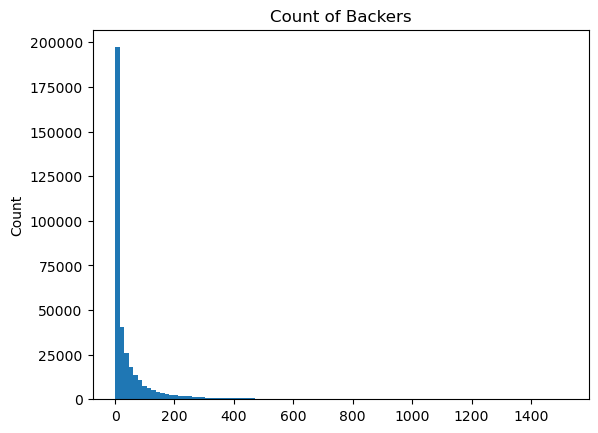

In [364]:
plt.hist(s8.backers, bins=100)
plt.ylabel('Count')
plt.title('Count of Backers')
plt.show()

In [365]:
# Vast majority of projects have 0 backers.

In [366]:
s8.backers.describe([.2, .4, .6, .8])

count    366511.00000
mean         62.54484
std         148.99795
min           0.00000
20%           1.00000
40%           6.00000
50%          12.00000
60%          23.00000
80%          73.00000
max        1518.00000
Name: backers, dtype: float64

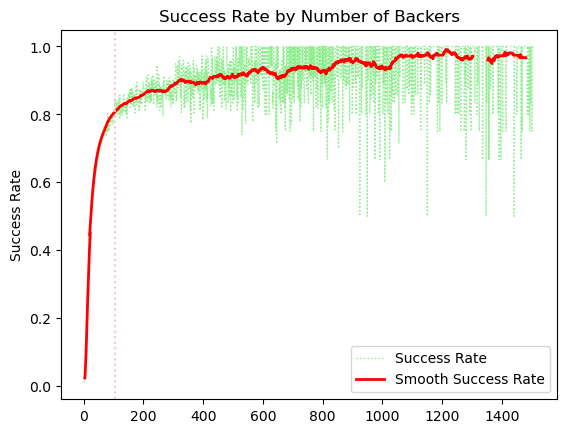

In [367]:
# Visualizing the success rate by backers

sb = s8[(s8['state'] == 'successful')]['backers'].value_counts().sort_index() 
tb = s8['backers'].value_counts().sort_index()

srplot = sb/tb

srplot = pd.Series(sb/tb)

srplotr  = srplot.rolling(4).mean()
srplotr2 = srplot.rolling(50).mean()

plt.plot(list(srplot),   label='Success Rate', linestyle='dotted',color='lightgreen', linewidth=1)
plt.plot(list(srplotr[:23]),  label='Smooth Success Rate', color='red', linewidth=2)
plt.plot(list(srplotr2[30:]), color='red', linewidth=2)
plt.axvline(x=105, color='pink', linestyle='dotted')
# plt.axvline(x=25, color='pink', linestyle='dotted')

plt.title('Success Rate by Number of Backers')
plt.ylabel('Success Rate')
plt.ylabel('Success Rate')
plt.legend()
plt.show()

In [368]:
# I broke this graph into 2 rolling periods  to smooth out the shape of the trend at higher values. This
# visual was made to convey a message, which combining the a rolling window of 4 and 50 is able to accomplish.
# This method assumes that a 4 backer difference at lower values is not significant, and a 50 backer difference at
# higher values is not significant.  This difference allows us to see the overall trend better and how the more 
# backers a project has, the higher proportion of projects are successful.

# Pink vertical line is at 105 backers, and demonstrates that at this amount of backers, 
# 80% of projects were successful

In [369]:
# Does the proportion of projects above the 80% line differ from the rest of the data?

b105   = s8[s8['backers'] >= 105]
l105 = s8[s8['backers'] < 105]

In [370]:
print(b105.shape)
print(l105.shape)

(53811, 23)
(312700, 23)


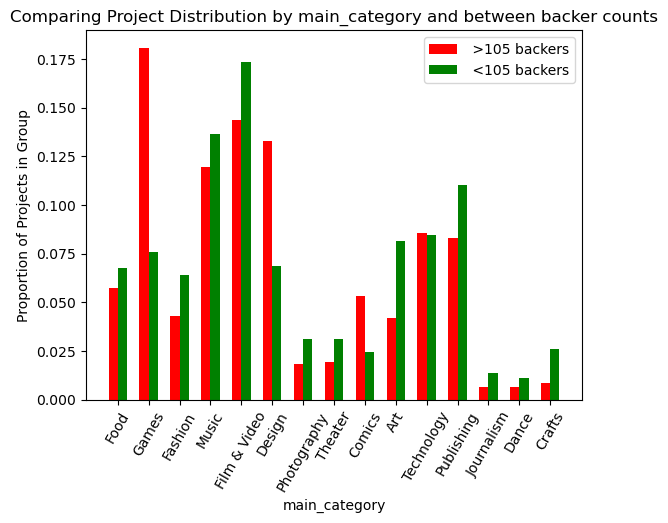

In [371]:
cats = list(b105['main_category'].unique())
width=0.3

plt.bar(np.arange(len(cats)) - width/ 2, Pandops.return_value_counts(b105, 'main_category')[cats] / b105.shape[0], 
        width=width, label=' >105 backers', color='red')

plt.bar(np.arange(len(cats)) + width/ 2, Pandops.return_value_counts(l105, 'main_category')[cats] / l105.shape[0], 
        width=width, label=' <105 backers', color='green')

plt.xticks(np.arange(len(cats)), cats, rotation=60)


plt.title('Comparing Project Distribution by main_category and between backer counts')
plt.legend()
plt.xlabel('main_category')
plt.ylabel('Proportion of Projects in Group')
plt.show()

In [372]:
# When comparing the distribution of projects with more than 105 backers to the rest of the data, it's clear
# that there tends to be 10% more games projects in this subdataset, and 6% more design projects. 

In [373]:
# Does the currency affect whether a project incurs more backers?

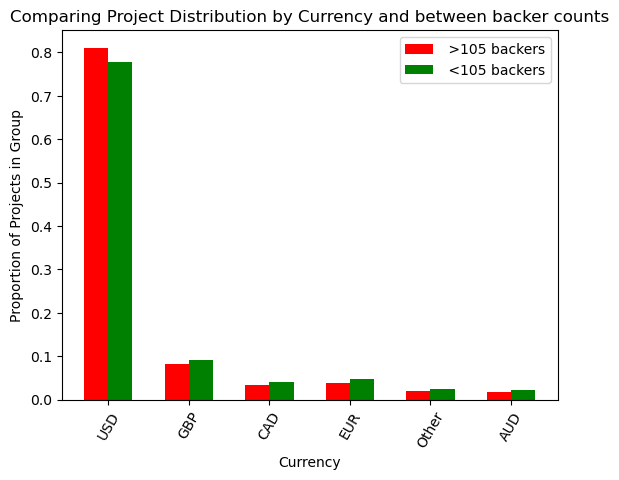

In [374]:
cats = list(b105['currency'].unique())
width=0.3

plt.bar(np.arange(len(cats)) - width/ 2, b105['currency'].value_counts()[cats] / b105.shape[0], width=width, label=' >105 backers', color='red')
plt.bar(np.arange(len(cats)) + width/ 2, l105['currency'].value_counts()[cats] / l105.shape[0], width=width, label=' <105 backers', color='green')

plt.xticks(np.arange(len(cats)), cats, rotation=60)

plt.title('Comparing Project Distribution by Currency and between backer counts')
plt.legend()
plt.xlabel('Currency')
plt.ylabel('Proportion of Projects in Group')
plt.show()

In [375]:
print(round(b105['currency'].value_counts()[cats] / b105.shape[0], 3))
print()
print(round(l105['currency'].value_counts()[cats] / l105.shape[0],3))

USD      0.811
GBP      0.081
CAD      0.033
EUR      0.038
Other    0.020
AUD      0.017
Name: currency, dtype: float64

USD      0.777
GBP      0.091
CAD      0.040
EUR      0.047
Other    0.023
AUD      0.021
Name: currency, dtype: float64


In [376]:
print(sum([.033, .038, .02, .01]))
print(sum([.04, .041, .023, .021]))

0.101
0.125


In [377]:
# This graph shows the distribution of the group above 105 backers based on currency. It appears
# that observations in the >105 backers groups will tend to be USD in comparison to other currencies.

#### Backers Takeaway

=> Vast majority of projects have 0 backers

=> As expected, the more backers a project has, the higher the probability that the project will be successful. 
    -> Backers =   0, a project has a near 0% success rate
    -> Backers =  25, a project has ~50% success rate
    -> Backers = 105, a project has ~80% success rate

=> In the group of projects that have more than 105 backers, there tends to be more game projects and design projects present. This is interesting because referencing the category section, these groups did not tend to have
high success rates. 

=> For currencies, the distribution is very similar between the >105 backers and <105 backers. However, if we compared the western, english currencies (GBP and USD) to the rest of the currencies:
    -> 10.1% of projects above 105 backers are not USD or GBP
    -> 12.5$ of projects below 105 backers are not USD or GBP

This shows slight favor of the western, english currencies over others, which may be due to popularity of Kickstarter in its native regions.


### Goal and Pledged

In [378]:
s8.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency   deadline     goal   launched  \
0          Poetry    Publishing      GBP 2015-10-09   1000.0 2015-08-11   
1  Narrative Film  Film & Video      USD 2017-11-01  30000.0 2017-09-02   
2  Narrative Film  Film & Video      USD 2013-02-26  45000.0 2013-01-12   
3           Music         Music      USD 2012-04-16   5000.0 2012-03-17   
4    Film & Video  Film & Video      USD 2015-08-29  19500.0 2015-07-04   

   pledged   state  ...  usd_goal_real  days_active  year_deadline  \
0      0.0  failed  ...        1533.95           59           2015   
1   2421.0  failed  ...       30000.00           60           2017   
2    220.0  failed  ...       45000.00           45           2013   
3      1.0  failed  ...        5000.00           30           2012   
4   1283.0  failed  ...       19500.00           56           2015   

   month_deadline  day_deadline  year_launched  month_launched  day_launched  \
0              10             9           2015               8            11   
1              11             1           2017               9             2   
2               2            26           2013               1            12   
3               4            16           2012               3            17   
4               8            29           2015               7             4   

   ym_deadline  ym_launched  
0      2015-10      2015-08  
1      2017-11      2017-09  
2      2013-02      2013-01  
3      2012-04      2012-03  
4      2015-08      2015-07  

[5 rows x 23 columns]

In [379]:
s8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366511 entries, 0 to 378660
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                366511 non-null  int64         
 1   name              366508 non-null  object        
 2   category          366511 non-null  object        
 3   main_category     366511 non-null  object        
 4   currency          366511 non-null  object        
 5   deadline          366511 non-null  datetime64[ns]
 6   goal              366511 non-null  float64       
 7   launched          366511 non-null  datetime64[ns]
 8   pledged           366511 non-null  float64       
 9   state             366511 non-null  object        
 10  backers           366511 non-null  int64         
 11  usd pledged       366511 non-null  float64       
 12  usd_pledged_real  366511 non-null  float64       
 13  usd_goal_real     366511 non-null  float64       
 14  days

In [380]:
round(s8[['goal', 'usd_goal_real', 'pledged', 'usd pledged', 'usd_pledged_real']].describe([.5, .75, .9, .99,.995,.999]))

goal  usd_goal_real    pledged  usd pledged  usd_pledged_real
count     366511.0       366511.0   366511.0     366511.0          366511.0
mean       48318.0        44690.0     5939.0       4352.0            5422.0
std      1165497.0      1133077.0    28529.0      16758.0           19993.0
min            0.0            0.0        0.0          0.0               0.0
50%         5000.0         5383.0      603.0        385.0             606.0
75%        15400.0        15079.0     3890.0       2929.0            3864.0
90%        50000.0        45000.0    12780.0      10239.0           12535.0
99%       380000.0       325000.0    79350.0      59976.0           72305.0
99.5%     750000.0       623605.0   119914.0      88683.0          107108.0
99.9%    4000000.0      3500000.0   307502.0     192096.0          232151.0
max    100000000.0    166361391.0  4075739.0    2319876.0         2370611.0

In [381]:
# The values for the goal / pledged with their usd_real counterparts seem to be rather consistent however, at
# the 90 percentile, we see a discrepancy that appears to become larger when increasing for both goal and pledged.
# In order to make the dataset and visualizations more managable, let's see how projects perform at the high end

In [382]:
print(s8[s8['goal'] >= 750000].shape[0])
s8[s8['goal'] >= 750000].state.value_counts()

1904


failed        1896
successful       8
Name: state, dtype: int64

In [383]:
print(s8[s8['pledged'] >= 119914].shape[0])
s8[s8['pledged'] >= 119914].state.value_counts()

1833


successful    1692
failed         141
Name: state, dtype: int64

In [384]:
print(s8[s8['pledged'] >= 303477].shape[0])
s8[s8['pledged'] >= 303477].state.value_counts()

386


successful    364
failed         22
Name: state, dtype: int64

In [385]:
# With the goal in that range, it seems rather consistent that the project will not perform well, however,
# with the amount pledged on the high end, we see that there is more variability and it isn't a certainty that
# a project will perform well. Understandably, it is much easier to set a high goal in comparison to gaining
# a high pledge amount. However, we will clip the top 0.1% of pledged, in order to make the range more balanced
# and representative

In [386]:
s9 = Pandops.new_step(s8)

In [387]:
s9 = s9[(s9['goal'] <= 750000) & (s9['pledged'] <=303477)]

In [388]:
round(s9[['goal', 'usd_goal_real', 'pledged', 'usd pledged', 'usd_pledged_real']].describe([.5, .75, .9, .99,.995,.999]))

goal  usd_goal_real   pledged  usd pledged  usd_pledged_real
count  364336.0       364336.0  364336.0     364336.0          364336.0
mean    19449.0        18684.0    5331.0       4156.0            5131.0
std     49987.0        48412.0   15820.0      12937.0           14912.0
min         0.0            0.0       0.0          0.0               0.0
50%      5000.0         5198.0     607.0        390.0             611.0
75%     15000.0        15000.0    3883.0       2930.0            3861.0
90%     45000.0        40000.0   12665.0      10203.0           12454.0
99%    250000.0       250000.0   74528.0      57749.0           68778.0
99.5%  377975.0       350000.0  108320.0      84263.0          101740.0
99.9%  600000.0       600000.0  202197.0     164435.0          184987.0
max    750000.0      1197700.0  303429.0     452385.0          463784.0

In [389]:
# Now that we clipped the data, let's see how goal / pledged compare to their usd_real counter parts

Text(0, 0.5, 'USD_pledged_real amounts')

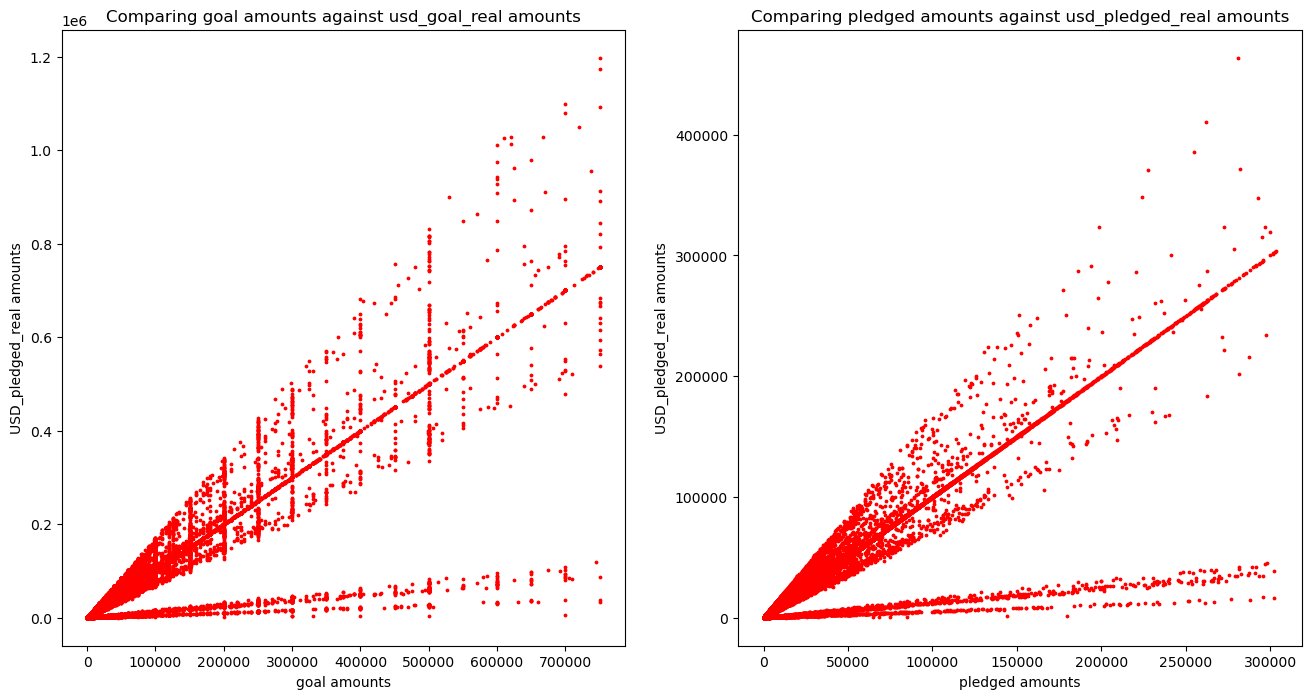

In [390]:
fig, axs = plt.subplots(1, 2, figsize=(16,8))

axs[0].scatter(s9.goal, s9.usd_goal_real, s=3, c='r')
axs[0].set_title('Comparing goal amounts against usd_goal_real amounts')
axs[0].set_xlabel('goal amounts')
axs[0].set_ylabel('USD_pledged_real amounts')

axs[1].scatter(s9.pledged, s9.usd_pledged_real, s=3, c='r')

axs[1].set_title('Comparing pledged amounts against usd_pledged_real amounts')
axs[1].set_xlabel('pledged amounts')
axs[1].set_ylabel('USD_pledged_real amounts')




In [391]:
# Right off the bat, it does appear that there are large discrepencies between the goal/pledged and usd_real.
# Let's compare the ratios to see if it gives a different picture. In the end, we will need to choose one or
# the other, since it wouldn't be valuable, efficient, or effective to include both the original values with their
# usd_real counterparts. The discrepencies aren't random, and we can see several lines that generate from (0,0)
# and continue outwards. In goals, there are several "vertical lines" that appear which make sense since the goal
# is a set value determined by the project coordinator. In comparison, the pledged plot does not have the 
# "vertical lines" since pledged represents the accruation of money, and would likely not be a nice, round number

In [392]:
s9['goal_ratio'] = s9['usd_goal_real'] / s9['goal']
s9['pledged_ratio'] = s9['usd_pledged_real'] / s9['pledged']

In [393]:
s9[['goal_ratio', 'pledged_ratio']].describe([.5, .75, .9, .99,.995,.999])

goal_ratio  pledged_ratio
count  364336.000000  314276.000000
mean        1.024091       1.024279
std         0.194913       0.191517
min         0.008757       0.008757
50%         1.000000       1.000000
75%         1.000000       1.000000
90%         1.142700       1.141202
99%         1.659476       1.658415
99.5%       1.682538       1.682393
99.9%       1.708675       1.708677
max         1.714400       1.714667

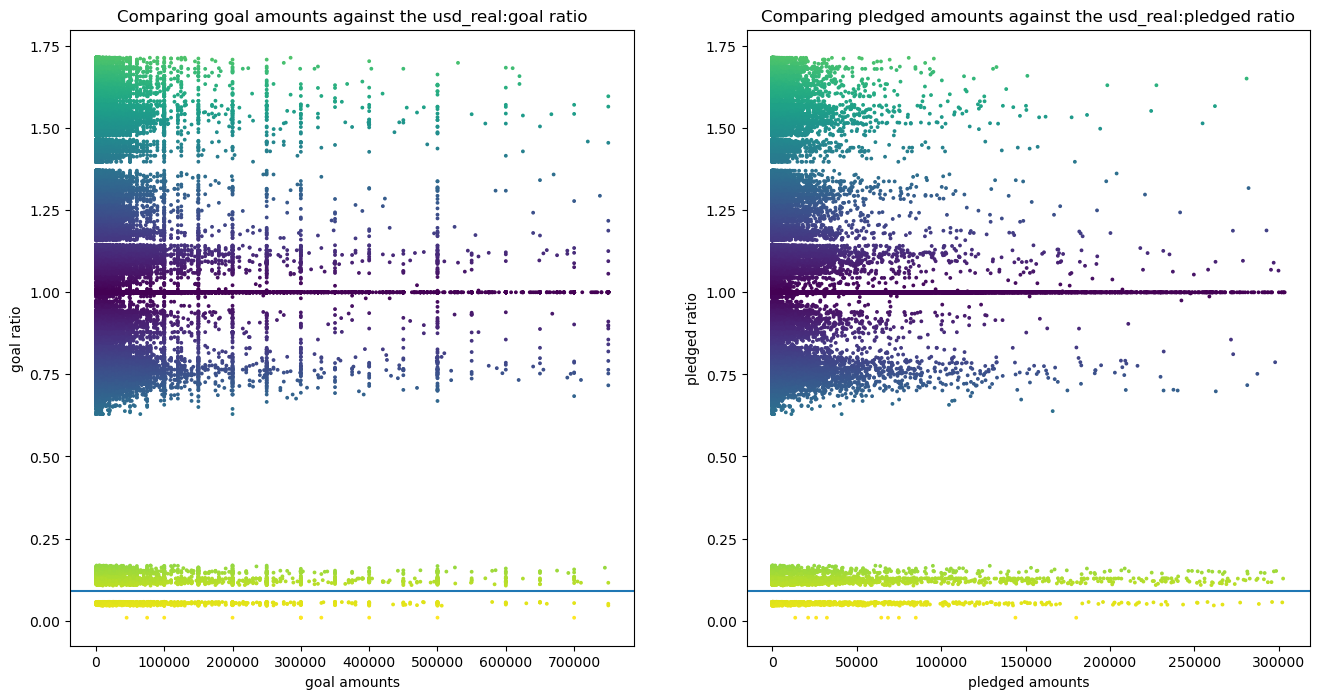

In [394]:
fig, axs = plt.subplots(1, 2, figsize=(16,8))

axs[0].scatter(s9.goal, s9.goal_ratio, s=3, c= -abs(1-s9.goal_ratio) ,cmap='viridis_r')

axs[0].set_title('Comparing goal amounts against the usd_real:goal ratio')
axs[0].set_xlabel('goal amounts')
axs[0].set_ylabel('goal ratio')

axs[1].scatter(s9.pledged, s9.pledged_ratio, s=3, c= -abs(1-s9.goal_ratio) ,cmap='viridis_r')

axs[1].set_title('Comparing pledged amounts against the usd_real:pledged ratio')
axs[1].set_xlabel('pledged amounts')
axs[1].set_ylabel('pledged ratio')

axs[0].axhline(y=0.09)
axs[1].axhline(y=0.09)
plt.show()

In [395]:
# When comparing the ratio to goal, we can more clearly see the groupings. Let's take a closer look at the clearly
# defined group below the 0.09 ratio.

In [396]:
ug = s9[s9['goal_ratio'] <= 0.09]
print(ug.shape)

up = s9[s9['pledged_ratio'] <= 0.09]
print(up.shape)

(1554, 25)
(1200, 25)


In [397]:
print(ug.year_launched.value_counts().sort_index())

print(ug.currency.value_counts().sort_index())
print()
print(up.year_launched.value_counts().sort_index())

print(up.currency.value_counts().sort_index())

2016     265
2017    1289
Name: year_launched, dtype: int64
Other    1554
Name: currency, dtype: int64

2016    207
2017    993
Name: year_launched, dtype: int64
Other    1200
Name: currency, dtype: int64


In [398]:
# This cluster occurs solely in the years 2016-2017 and are of a currency that are not USD
# This gives us insight on why other clusters are so different as well

In [399]:
sorted(list(s9.year_launched.unique()))

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

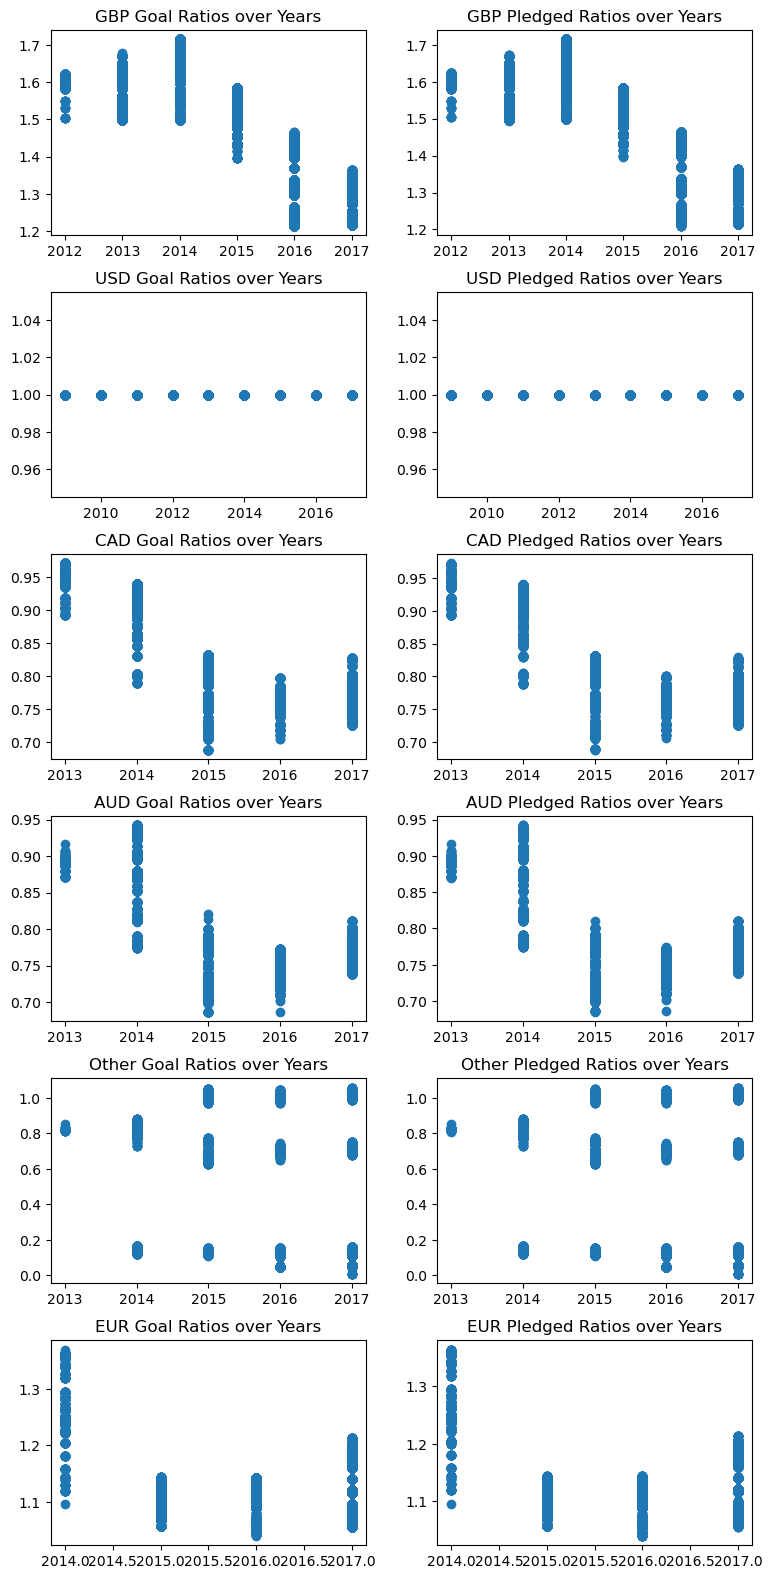

In [400]:
fig, axs = plt.subplots(6, 2, figsize=(8,16))

i = 0
ylist = sorted(list(s9.year_launched.unique()))
fig.tight_layout(pad=2)
for item in s9.currency.unique():
    temp  = s9[s9['currency'] == item]
    
    axs[i, 0].set_title(item + ' Goal Ratios over Years')
    axs[i, 1].set_title(item + ' Pledged Ratios over Years')
    
    axs[i, 0].scatter(temp['year_launched'], temp['goal_ratio'])
    axs[i, 1].scatter(temp['year_launched'], temp['pledged_ratio'])
    
    i+=1

plt.show()
    


In [401]:
# This allows us to explain the differences in usd_goal_real and the goal can be attributed to the currency type
# and the year. This is likely due to the conversion of each currency to usd based on the rate, and value at the
# time of conversion. Other has a few different clusters based on the individual currency, but overall, this can
# help us make a decision on how to proceed with these variables.

In [402]:
# Goal and pledged are very important variables to consider together. The ratio of goal / pledged with the
# usd_real counterparts should be the same

In [403]:
s9['gp_ratio'] = s9['pledged'] / s9['goal']
s9['gpusd_ratio'] = s9['usd_pledged_real'] / s9['usd_goal_real']

In [404]:
s9[['gp_ratio', 'gpusd_ratio']].describe([0.25, 0.5, 0.75, 0.9, 0.99, 0.999])

gp_ratio    gpusd_ratio
count  364336.000000  364336.000000
mean        2.520888       2.521092
std       170.942151     170.953199
min         0.000000       0.000000
25%         0.004875       0.004875
50%         0.132200       0.132200
75%         1.060000       1.060000
90%         1.474000       1.474000
99%         7.861646       7.861646
99.9%      84.866000      84.866000
max     68764.100000   68764.100000

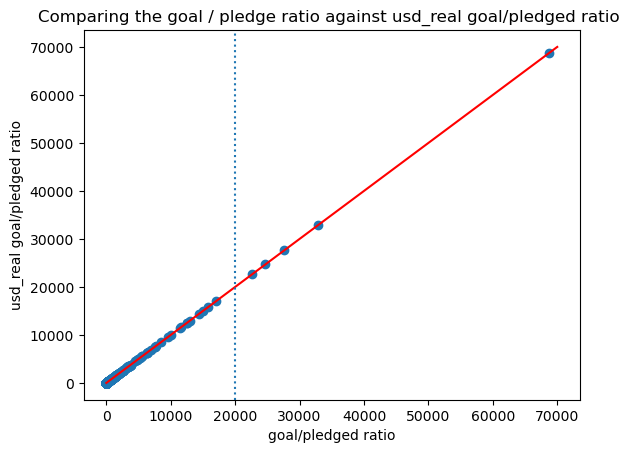

In [405]:
plt.scatter(s9.gp_ratio, s9.gpusd_ratio)
x = np.arange(70000)
y=x
plt.plot(x,y,c='r')
plt.title('Comparing the goal / pledge ratio against usd_real goal/pledged ratio ')
plt.xlabel('goal/pledged ratio')
plt.ylabel('usd_real goal/pledged ratio')
plt.axvline(x=20000, linestyle='dotted')
plt.show()

In [406]:
# Outliers are causing this visualization to be less effective.

In [407]:
s9[s9['gp_ratio'] >= 15].shape[0] # Few points are above this ratio. We will remove these

1692

In [408]:
s10 = Pandops.new_step(s9)

In [409]:
s10 = s10[s10['gp_ratio'] <= 15]
s10.shape

(362646, 27)

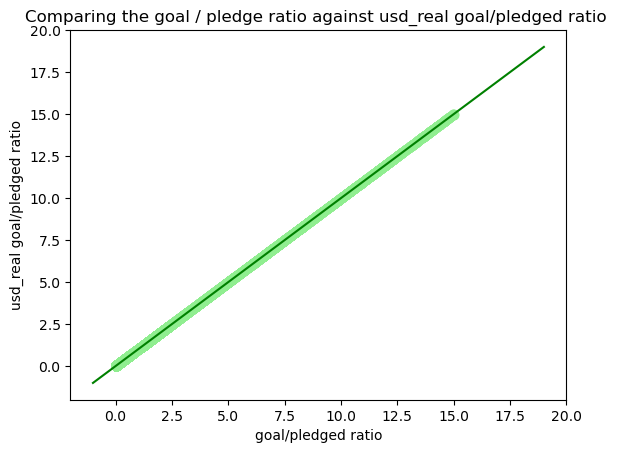

In [410]:
plt.scatter(s10.gp_ratio, s10.gpusd_ratio, c='lightgreen', linewidth=1)
x = np.arange(-1, 20, 1)
y=x

plt.title('Comparing the goal / pledge ratio against usd_real goal/pledged ratio ')
plt.xlabel('goal/pledged ratio')
plt.ylabel('usd_real goal/pledged ratio')

plt.plot(x,y,c='green')
plt.show()

In [411]:
# This viauslization demonstrates that even though there are differences between goal / pledged and the usd_real
# values, they both represent the same information accurately in terms of the relationship between goal and 
# pledged. At this point is it better to use one or the other? In this situation, since the scale of the data is 
# approximately the same within both features, I'm going to opt to use the usd_real value in order to put the 
# value within a feature at a same scale. For example, 1000 GBP != 1000 USD in 2014, so we can account for this
# discrepency in value with the conversin. Even though we include the currency type in the dataset, 
# this method is much more directly representative of true value.

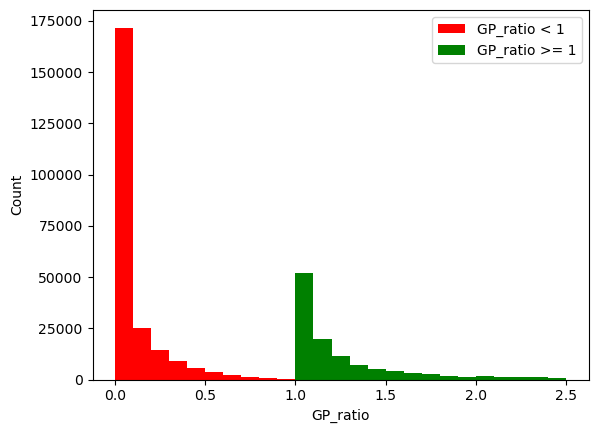

In [477]:
# Seeing how pledge ratio is indicative of successful / failure labels

gplt1 = s10[s10['gpusd_ratio']  < 1]
gpgt1 = s10[(s10['gpusd_ratio'] >= 1)]
gpgt1 = gpgt1[gpgt1['gpusd_ratio'] <= 2.5]


plt.hist(gplt1['gpusd_ratio'], bins=10, color='red', label='GP_ratio < 1')
plt.hist(gpgt1['gpusd_ratio'], bins=15, color='green',label='GP_ratio >= 1')
plt.legend()
plt.xlabel('GP_ratio')
plt.ylabel('Count')
plt.show()


In [413]:
# There is a clear boundary  above. Let's explore the boundary deeper

print('gp_ratio < 1')
print(Pandops.return_value_counts(gplt1, 'state'))
print()
print('gp_ratio >= 1')
print(Pandops.return_value_counts(gpgt1, 'state'))

gp_ratio < 1
failed        233776
successful         5
Name: state, dtype: int64

gp_ratio >= 1
successful    113879
failed           538
Name: state, dtype: int64


In [414]:
# There are a few projects that break the boundary seen above

In [415]:
gpgt1[gpgt1['state'] == 'failed'].describe()

ID           goal        pledged      backers    usd pledged  \
count  5.380000e+02     538.000000     538.000000   538.000000     538.000000   
mean   1.068168e+09   12915.490706   17383.061227   128.436803   12103.504164   
std    6.081722e+08   23942.313860   31600.890463   197.741034   26303.410014   
min    6.820661e+06       1.000000       1.000000     1.000000       0.000000   
25%    5.543033e+08     500.000000     510.250000    10.000000     310.252500   
50%    1.079986e+09    3000.000000    3531.710000    42.000000    2167.000000   
75%    1.597670e+09   15000.000000   20096.500000   155.750000   11283.675000   
max    2.137065e+09  250000.000000  265628.000000  1335.000000  259789.140000   

       usd_pledged_real  usd_goal_real  days_active  year_deadline  \
count        538.000000     538.000000   538.000000     538.000000   
mean       16844.202993   12659.650242    34.776952    2015.031599   
std        30163.420125   23944.265739    12.376559       1.793046   
min            1.000000       0.760000     5.000000    2009.000000   
25%          504.250000     500.000000    30.000000    2014.000000   
50%         3317.335000    3000.000000    30.000000    2015.000000   
75%        20145.947500   15000.000000    41.000000    2017.000000   
max       259789.140000  250000.000000    77.000000    2018.000000   

       month_deadline  day_deadline  year_launched  month_launched  \
count      538.000000    538.000000     538.000000      538.000000   
mean         7.003717     14.968401    2014.953532        6.786245   
std          3.385255      8.764715       1.789603        3.239197   
min          1.000000      1.000000    2009.000000        1.000000   
25%          4.000000      7.000000    2014.000000        4.000000   
50%          8.000000     15.000000    2015.000000        7.000000   
75%         10.000000     22.000000    2016.000000       10.000000   
max         12.000000     31.000000    2017.000000       12.000000   

       day_launched  goal_ratio  pledged_ratio    gp_ratio  gpusd_ratio  
count    538.000000  538.000000     538.000000  538.000000   538.000000  
mean      15.394052    1.012340       1.012332    1.361059     1.361036  
std        8.677381    0.207897       0.207910    0.397580     0.397543  
min        1.000000    0.116007       0.116007    1.000000     1.000000  
25%        8.000000    1.000000       1.000000    1.040000     1.040000  
50%       15.000000    1.000000       1.000000    1.208304     1.208304  
75%       22.000000    1.000000       1.000000    1.564379     1.564379  
max       31.000000    1.714167       1.714167    2.500000     2.500000

In [416]:
# Of the projects that failed that have a gp_ratio greater than 1, at least 75% of them goal

In [417]:
# This histogram clearly shows the classification of successful / failed is strongly indicated by the gp_ratio. 
# The gp ratio represents if the goal was met or not, since >= 1 means that the pledged value has either met or 
# exceeded the goal value. If a machine learning model is trained with this feature can predict with very high
# accuracy whether a project status is either "successul" or "failed". However, there is another question to be
# answered which is what contributes to a successful project? I suspect that as a project is live, there should be
# indicators along the way to influence the final goal being reached. Although possible, it likely doesn't happen
# where a project suddenly has one donor that pledges the entire value of a project.

## Machine Learning - Model Preparation

In [418]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample

In [419]:
# With EDA completed and now that we have a strong sense of the quality of our data, we can move in preparing
# the dataset for machine learning models

In [420]:
s10.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency   deadline     goal   launched  \
0          Poetry    Publishing      GBP 2015-10-09   1000.0 2015-08-11   
1  Narrative Film  Film & Video      USD 2017-11-01  30000.0 2017-09-02   
2  Narrative Film  Film & Video      USD 2013-02-26  45000.0 2013-01-12   
3           Music         Music      USD 2012-04-16   5000.0 2012-03-17   
4    Film & Video  Film & Video      USD 2015-08-29  19500.0 2015-07-04   

   pledged   state  ...  day_deadline  year_launched  month_launched  \
0      0.0  failed  ...             9           2015               8   
1   2421.0  failed  ...             1           2017               9   
2    220.0  failed  ...            26           2013               1   
3      1.0  failed  ...            16           2012               3   
4   1283.0  failed  ...            29           2015               7   

   day_launched  ym_deadline  ym_launched  goal_ratio  pledged_ratio  \
0            11      2015-10      2015-08     1.53395            NaN   
1             2      2017-11      2017-09     1.00000            1.0   
2            12      2013-02      2013-01     1.00000            1.0   
3            17      2012-04      2012-03     1.00000            1.0   
4             4      2015-08      2015-07     1.00000            1.0   

   gp_ratio  gpusd_ratio  
0  0.000000     0.000000  
1  0.080700     0.080700  
2  0.004889     0.004889  
3  0.000200     0.000200  
4  0.065795     0.065795  

[5 rows x 27 columns]

In [421]:
# We can drop categories that are either dedundant or do not help predict the final outcome

In [422]:
s10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362646 entries, 0 to 378660
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                362646 non-null  int64         
 1   name              362643 non-null  object        
 2   category          362646 non-null  object        
 3   main_category     362646 non-null  object        
 4   currency          362646 non-null  object        
 5   deadline          362646 non-null  datetime64[ns]
 6   goal              362646 non-null  float64       
 7   launched          362646 non-null  datetime64[ns]
 8   pledged           362646 non-null  float64       
 9   state             362646 non-null  object        
 10  backers           362646 non-null  int64         
 11  usd pledged       362646 non-null  float64       
 12  usd_pledged_real  362646 non-null  float64       
 13  usd_goal_real     362646 non-null  float64       
 14  days

In [423]:
s10.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'usd pledged',
       'usd_pledged_real', 'usd_goal_real', 'days_active', 'year_deadline',
       'month_deadline', 'day_deadline', 'year_launched', 'month_launched',
       'day_launched', 'ym_deadline', 'ym_launched', 'goal_ratio',
       'pledged_ratio', 'gp_ratio', 'gpusd_ratio'],
      dtype='object')

In [424]:
# Only including relevant categories
mldf = s10[['category', 'main_category', 'currency', 'state', 'backers',
            'usd_pledged_real', 'usd_goal_real', 'days_active', 'year_launched', 
            'month_launched','gpusd_ratio']]

In [425]:
mldf.head()

category main_category currency   state  backers  usd_pledged_real  \
0          Poetry    Publishing      GBP  failed        0               0.0   
1  Narrative Film  Film & Video      USD  failed       15            2421.0   
2  Narrative Film  Film & Video      USD  failed        3             220.0   
3           Music         Music      USD  failed        1               1.0   
4    Film & Video  Film & Video      USD  failed       14            1283.0   

   usd_goal_real  days_active  year_launched  month_launched  gpusd_ratio  
0        1533.95           59           2015               8     0.000000  
1       30000.00           60           2017               9     0.080700  
2       45000.00           45           2013               1     0.004889  
3        5000.00           30           2012               3     0.000200  
4       19500.00           56           2015               7     0.065795

In [426]:
# Shorten feature name
mldf = mldf.rename(columns={'usd_pledged_real': 'pledged_usd',
                            'usd_goal_real': 'goal_usd'})

In [427]:
mldf.columns

Index(['category', 'main_category', 'currency', 'state', 'backers',
       'pledged_usd', 'goal_usd', 'days_active', 'year_launched',
       'month_launched', 'gpusd_ratio'],
      dtype='object')

In [428]:
mldf.shape # 10 features to predict 1 target - will be many more when converting categorical to ohv

(362646, 11)

In [429]:
# Removing redundant categories (categories that share a name with the main_category)
mc = list(mldf['main_category'].unique()) # Retrieving list of main_categories

mldf['category'] = mldf['category'].replace(mc, 'X') # If a category equals a main_category, it will be replaced

In [430]:
# Making sure values match
print('mldf', mldf[mldf['category']=='X'].shape[0])

print('s10 (before change)', s10[s10['category'].isin(mc)].shape[0])

mldf 135403
s10 (before change) 135403


In [431]:
# Split into categorical and numerical variables
mldf_cat = mldf[['main_category','category', 'currency', 'year_launched', 'month_launched']]
mldf_num = mldf[['backers', 'pledged_usd', 'goal_usd', 'days_active', 'gpusd_ratio']]

In [432]:
# Converting categorical features into one-hot-vector
cout = pd.DataFrame()

a = pd.get_dummies(mldf_cat.main_category, prefix='main_category')
b = pd.get_dummies(mldf_cat.category, prefix='category')
c = pd.get_dummies(mldf_cat.currency, prefix='currency')
d = pd.get_dummies(mldf_cat.year_launched, prefix='yrlaunch')
e = pd.get_dummies(mldf_cat.month_launched, prefix='molaunch')

dl = [a,b,c,d,e]
dlab = ['a', 'b', 'c', 'd', 'e']
temp = []

for i in range(5):
    print(dlab[i], dl[i].shape)
    temp.append(dl[i].shape[1])

print('Sum of Categorical features',sum(temp))
    

cout = pd.concat(dl, axis=1)
print(cout.shape)

a (362646, 15)
b (362646, 61)
c (362646, 6)
d (362646, 9)
e (362646, 12)
Sum of Categorical features 103
(362646, 103)


In [433]:
# Removing X for category. All categories that had a redundant category that's a main_category will now only
# have the main_category
cout = cout.drop('category_X', axis=1)
print(cout.shape) # checking to see if there's one less column

(362646, 102)


In [434]:
# Categorical Variables are ready

In [435]:
mldf_num.head()

backers  pledged_usd  goal_usd  days_active  gpusd_ratio
0        0          0.0   1533.95           59     0.000000
1       15       2421.0  30000.00           60     0.080700
2        3        220.0  45000.00           45     0.004889
3        1          1.0   5000.00           30     0.000200
4       14       1283.0  19500.00           56     0.065795

In [436]:
scaler = MinMaxScaler()

In [437]:
for col in mldf_num.columns:
    mldf_num[col] = scaler.fit_transform(np.array(mldf_num[col]).reshape(-1,1))

/var/folders/fq/scyd1p2x2bg59ynvyx1898gc0000gn/T/ipykernel_22427/1410047825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mldf_num[col] = scaler.fit_transform(np.array(mldf_num[col]).reshape(-1,1))
/var/folders/fq/scyd1p2x2bg59ynvyx1898gc0000gn/T/ipykernel_22427/1410047825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mldf_num[col] = scaler.fit_transform(np.array(mldf_num[col]).reshape(-1,1))
/var/folders/fq/scyd1p2x2bg59ynvyx1898gc0000gn/T/ipykernel_22427/1410047825.py:2: SettingWithCopyWarning

In [438]:
mldf_num.head()

backers  pledged_usd  goal_usd  days_active  gpusd_ratio
0  0.000000     0.000000  0.001281     0.637363     0.000000
1  0.009881     0.005220  0.025048     0.648352     0.005384
2  0.001976     0.000474  0.037572     0.483516     0.000326
3  0.000659     0.000002  0.004175     0.318681     0.000013
4  0.009223     0.002766  0.016281     0.604396     0.004390

In [439]:
# Numeric data is normalized and within the range of 0-1. 

# Combining data back into a single dataframe 

In [440]:
print(cout.shape)
print(mldf_num.shape)

(362646, 102)
(362646, 5)


In [441]:
mldf2 = pd.concat([cout, mldf_num], axis=1)

In [442]:
mldf2.head()

main_category_Art  main_category_Comics  main_category_Crafts  \
0                  0                     0                     0   
1                  0                     0                     0   
2                  0                     0                     0   
3                  0                     0                     0   
4                  0                     0                     0   

   main_category_Dance  main_category_Design  main_category_Fashion  \
0                    0                     0                      0   
1                    0                     0                      0   
2                    0                     0                      0   
3                    0                     0                      0   
4                    0                     0                      0   

   main_category_Film & Video  main_category_Food  main_category_Games  \
0                           0                   0                    0   
1                           1                   0                    0   
2                           1                   0                    0   
3                           0                   0                    0   
4                           1                   0                    0   

   main_category_Journalism  ...  molaunch_8  molaunch_9  molaunch_10  \
0                         0  ...           1           0            0   
1                         0  ...           0           1            0   
2                         0  ...           0           0            0   
3                         0  ...           0           0            0   
4                         0  ...           0           0            0   

   molaunch_11  molaunch_12   backers  pledged_usd  goal_usd  days_active  \
0            0            0  0.000000     0.000000  0.001281     0.637363   
1            0            0  0.009881     0.005220  0.025048     0.648352   
2            0            0  0.001976     0.000474  0.037572     0.483516   
3            0            0  0.000659     0.000002  0.004175     0.318681   
4            0            0  0.009223     0.002766  0.016281     0.604396   

   gpusd_ratio  
0     0.000000  
1     0.005384  
2     0.000326  
3     0.000013  
4     0.004390  

[5 rows x 107 columns]

In [443]:
# To this point, the target, state, is not in the mldf2 DataFrame
# I need to pull this data from the original and also turn it into a numerical value

In [444]:
mldf2['target'] = mldf['state'].replace(['failed', 'successful'], [0,1])

In [445]:
mldf2

main_category_Art  main_category_Comics  main_category_Crafts  \
0                       0                     0                     0   
1                       0                     0                     0   
2                       0                     0                     0   
3                       0                     0                     0   
4                       0                     0                     0   
...                   ...                   ...                   ...   
378656                  0                     0                     0   
378657                  0                     0                     0   
378658                  0                     0                     0   
378659                  0                     0                     0   
378660                  1                     0                     0   

        main_category_Dance  main_category_Design  main_category_Fashion  \
0                         0                     0                      0   
1                         0                     0                      0   
2                         0                     0                      0   
3                         0                     0                      0   
4                         0                     0                      0   
...                     ...                   ...                    ...   
378656                    0                     0                      0   
378657                    0                     0                      0   
378658                    0                     0                      0   
378659                    0                     0                      0   
378660                    0                     0                      0   

        main_category_Film & Video  main_category_Food  main_category_Games  \
0                                0                   0                    0   
1                                1                   0                    0   
2                                1                   0                    0   
3                                0                   0                    0   
4                                1                   0                    0   
...                            ...                 ...                  ...   
378656                           1                   0                    0   
378657                           1                   0                    0   
378658                           1                   0                    0   
378659                           0                   0                    0   
378660                           0                   0                    0   

        main_category_Journalism  ...  molaunch_9  molaunch_10  molaunch_11  \
0                              0  ...           0            0            0   
1                              0  ...           1            0            0   
2                              0  ...           0            0            0   
3                              0  ...           0            0            0   
4                              0  ...           0            0            0   
...                          ...  ...         ...          ...          ...   
378656                         0  ...           1            0            0   
378657                         0  ...           0            0            0   
378658                         0  ...           0            0            0   
378659                         0  ...           0            0            0   
378660                         0  ...           0            0            0   

        molaunch_12   backers  pledged_usd  goal_usd  days_active  \
0                 0  0.000000     0.000000  0.001281     0.637363   
1                 0  0.009881     0.005220  0.025048     0.648352   
2                 0  0.001976     0.000474  0.037572     0.483516   
3                 0  0.000659     0.000002  

In [446]:
Pandops.return_value_counts(mldf2, 'target') 

0    234431
1    128215
Name: target, dtype: int64

In [447]:
# Far fewer successful projects than failed - I will upsample to balance the target classes.
# Some machine learning models are sensitive to imbalances in the dataset, so I will create
# an additional dataset with upsampled "successful" projects

In [448]:
fmldf = Pandops.series_by_value(mldf2, 'target', 0)
smldf = Pandops.series_by_value(mldf2, 'target', 1)

In [449]:
# Upsampling the successful projects to be the same amount of datapoints as the failed projects
ups = resample(smldf,
               replace=True,
               n_samples=Pandops.series_by_value(mldf2, 'target', 0).shape[0])

In [450]:
# Verifying correct size
print(ups.shape)
print(fmldf.shape)

(234431, 108)
(234431, 108)


In [451]:
mldf3 = pd.concat([ups, fmldf])

In [452]:
# Balanced dataset
mldf3.shape

(468862, 108)

In [453]:
Pandops.return_value_counts(mldf3, 'target')

1    234431
0    234431
Name: target, dtype: int64

In [454]:
# All values are transformed and prepared to go into a model
X = mldf2.drop('target', axis=1).to_numpy()
y = mldf2['target'].to_numpy()

Xu = mldf3.drop('target', axis=1).to_numpy() # For models sensitive to unbalanced datasets
yu = mldf3['target'].to_numpy()

print(X.shape)
print(y.shape)
print()
print(Xu.shape)
print(yu.shape)

(362646, 107)
(362646,)

(468862, 107)
(468862,)


## Machine Learning - Model Building

In [455]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [456]:
# Breaking the model down into training, validation, and testing datasets into 60-20-20
x_train1, x_test, y_train1, y_test = train_test_split(X, y, test_size=.2, random_state=34)
x_train, x_val, y_train, y_val = train_test_split(x_train1, y_train1, test_size=.25, random_state=34)

print('training size', x_train.shape, y_train.shape)
print('validation size', x_val.shape, y_val.shape)
print('testing size', x_test.shape, y_test.shape)

training size (217587, 107) (217587,)
validation size (72529, 107) (72529,)
testing size (72530, 107) (72530,)


In [457]:
x_train1, xu_test, y_train1, yu_test = train_test_split(Xu, yu, test_size=.2, random_state=34)
xu_train, xu_val, yu_train, yu_val = train_test_split(x_train1, y_train1, test_size=.25, random_state=34)

print('training size', xu_train.shape, yu_train.shape)
print('validation size', xu_val.shape, yu_val.shape)
print('testing size', xu_test.shape, yu_test.shape)

training size (281316, 107) (281316,)
validation size (93773, 107) (93773,)
testing size (93773, 107) (93773,)


#### Dummy Classifier Baseline

In [233]:
# I'm first going to start out with a "dummy" classifier to serve as a baseline model and create
# a relative metric to see how other models perform. The "dummy" classifier represents the 
# "lowest" performing model, and in this case, it will predict the class that is most common in the target

dc = DummyClassifier(strategy='most_frequent')
dc.fit(x_train, y_train)
dcpred = dc.predict(x_test)


print(accuracy_score(y_test, dcpred))
print(classification_report(y_test, dcpred))


0.6461877843650903
              precision    recall  f1-score   support

           0       0.65      1.00      0.79     46868
           1       0.00      0.00      0.00     25662

    accuracy                           0.65     72530
   macro avg       0.32      0.50      0.39     72530
weighted avg       0.42      0.65      0.51     72530



/opt/homebrew/Caskroom/miniforge/base/envs/dsenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/dsenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/dsenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

#### Naive Bayes

In [234]:
# The naive bayes classifier calculates the probability a datapoint belongs to either class by multiplying
# the independent probabilities of each feature, and classifying as the class with the higher value

In [235]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [236]:
gnbpred = gnb.predict(x_test)

print(accuracy_score(y_test, gnbpred))
print(classification_report(y_test, gnbpred))

0.8003998345512202
              precision    recall  f1-score   support

           0       0.94      0.74      0.83     46868
           1       0.66      0.92      0.76     25662

    accuracy                           0.80     72530
   macro avg       0.80      0.83      0.80     72530
weighted avg       0.84      0.80      0.80     72530



In [237]:
# The Naive Bayes classifier gains 15% accuracy over the dummy classifier

#### Logistic Regression

In [238]:
# Logistic regression is a relatively simple classifier that calculates the odds of the datapoint being
# part of a class. Used only for binary classifications, which means it's applicable to our task.
# Logistic regression is sensitive to unbalanced datasets, so I will use the balanced data to train,
# but will test on the original test data.

In [239]:
lr = LogisticRegression(penalty='l2', max_iter=1000)
lr.fit(xu_train, yu_train)

LogisticRegression(max_iter=1000)

In [240]:
lrpred = lr.predict(x_test)

print(accuracy_score(y_test, lrpred))
print(classification_report(y_test, lrpred))

0.9921963325520474
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     46868
           1       0.98      1.00      0.99     25662

    accuracy                           0.99     72530
   macro avg       0.99      0.99      0.99     72530
weighted avg       0.99      0.99      0.99     72530



In [241]:
# 99.2% accurate is very high accuracy. This is because it can divide the dataset by the GP_ratio and retain
# substantially high accuracy. At this point, it is not worth exploring ensemble models, since they are
# more powerful, but take up a greater amount of resources - Instead, I will move on to an experimental question
# to gain more value out of the data.

## In a situation where the goal is unknown or irrelevant, is it still possible to predict the success of a project?

I want to explore and see whether having a predefined goal would affect the results. What if the goal was undetermined and an individual wants to see if they've accumulated enough funds for a project to be "successful"? They would need to consider the amount of backers behind a project, the typical success rate of projects within a category, the time period they're launching the project, etc. To see if predicting is possible without a predetermined goal, I'm going to remove all indicators of "goal" from the dataset, and try training models again to see if it's possible to gain insight on success of a project, without reaching a goal. In addition to the models above, I suspect that the accuracy will not be as high, so I will include ensemble learners in this section.

In [464]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [459]:
# Since we're only changing the features, the same target will still be corresponding to the correct datapoint
X2  = mldf2.drop(['target', 'gpusd_ratio', 'goal_usd'], axis=1).to_numpy()
Xu2 = mldf3.drop(['target', 'gpusd_ratio', 'goal_usd'], axis=1).to_numpy() # Upsampled dataset

print(X2.shape)
print(y.shape)
print()
print(Xu2.shape)
print(yu.shape)


(362646, 105)
(362646,)

(468862, 105)
(468862,)


In [460]:
# Transformations are already performed, will simply split the data up. This time, I want to 
# employ a different methodology and use k_cross_validation to maximize my training data

x_train, x_test, y_train, y_test = train_test_split(X2, y, test_size=.2, random_state=34)

xu_train, xu_test, yu_train, yu_test = train_test_split(Xu2, yu, test_size=.2, random_state=34)

#### Dummy Classifer 

In [245]:
# Results will be the same for the dummy classifier since the 'target' does not change
dc2 = DummyClassifier(strategy='most_frequent')
dc2.fit(x_train, y_train)

dc2pred = dc2.predict(x_test)

print(accuracy_score(y_test, dc2pred))
print(classification_report(y_test, dc2pred))

0.6461877843650903
              precision    recall  f1-score   support

           0       0.65      1.00      0.79     46868
           1       0.00      0.00      0.00     25662

    accuracy                           0.65     72530
   macro avg       0.32      0.50      0.39     72530
weighted avg       0.42      0.65      0.51     72530



/opt/homebrew/Caskroom/miniforge/base/envs/dsenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/dsenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/dsenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

##### Naive Bayes

In [246]:
gnb2 = GaussianNB()
gnb2.fit(x_train, y_train)

gnb2pred = gnb2.predict(x_test)

print(accuracy_score(y_test, gnb2pred))
print(classification_report(y_test, gnb2pred))

0.6923479939335447
              precision    recall  f1-score   support

           0       0.80      0.69      0.74     46868
           1       0.55      0.69      0.61     25662

    accuracy                           0.69     72530
   macro avg       0.68      0.69      0.68     72530
weighted avg       0.72      0.69      0.70     72530



In [247]:
# Immediately, we see that there is a drop in accuracy for the naive bayes classifier. It only has a 4% higher
# accuracy in comparison to the dummy classifier which predicts "failed" every time

#### Logistic Regression

In [248]:
lr2 = LogisticRegression(penalty='l2', max_iter=1000)
lr2.fit(xu_train, yu_train)

LogisticRegression(max_iter=1000)

In [249]:
lr2pred = lr2.predict(x_test)

print(accuracy_score(y_test, lr2pred))
print(classification_report(y_test, lr2pred))

0.8451261546946092
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     46868
           1       0.78      0.79      0.78     25662

    accuracy                           0.85     72530
   macro avg       0.83      0.83      0.83     72530
weighted avg       0.85      0.85      0.85     72530



In [250]:
# In comparison to the dataset that contained goal information, logistic regression performs substantially worse,
# however, given that critical features were removed from the dataset, this simple model performed relatively well

#### Random Forest Classifier

In [251]:
# Random Forest is an ensemble of decision tree classifiers, typically with short depth. The prediction from
# individual trees are conglomerated in a voting method to predict a class label. Trees that make more correct
# predictions will have more weight in the final prediction.

In [273]:
rf = RandomForestClassifier(max_depth=4, n_estimators=100, criterion='entropy', random_state=7)
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, random_state=7)

In [274]:
rfpred = rf.predict(x_test)

print(accuracy_score(y_test, rfpred))
print(classification_report(y_test, rfpred))

0.8504205156486971
              precision    recall  f1-score   support

           0       0.86      0.91      0.89     46868
           1       0.83      0.73      0.78     25662

    accuracy                           0.85     72530
   macro avg       0.84      0.82      0.83     72530
weighted avg       0.85      0.85      0.85     72530



In [254]:
# The random forest performs similarly to logistic regression

In [255]:
# A special aspect about random forests is that they're able to tell you about feature importance by returning
# how much weight particular features have in the final ouput

In [275]:
importance = rf.feature_importances_

In [276]:
rfimp = pd.Series(importance, index=mldf2.drop(['target', 'gpusd_ratio', 'goal_usd'], axis=1).columns)

In [277]:
top10 = rfimp.sort_values(ascending=False)[:10]

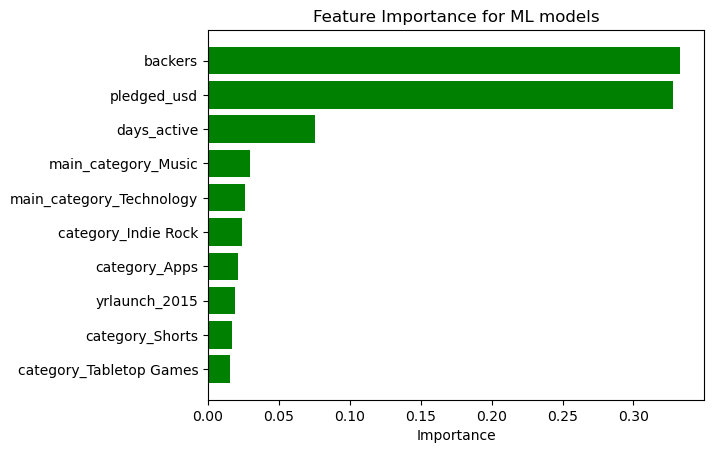

In [278]:
plt.barh(np.arange(10), top10[::-1], color='g')
plt.yticks(np.arange(10), top10.index[::-1], rotation=0)
plt.title('Feature Importance for ML models')
plt.xlabel('Importance')
plt.show()

In [279]:
sum(top10 )

0.8896888770901699

In [261]:
# This shows that a large majority (~60%) of the decision whether a project is successful comes down to the 
# number of backers, and the amount pledged - which makes sense considering backers and funds are both necessary
# for a project to be successful

# We also see that 3/10 of the most important features is the main category

# The top 10 features above account for 88.9% of the prediction that's output

#### K Nearest Neighbors

In [262]:
# KNNs are a simple model - they take the closest neighbors to an unknown point, and then the unknown point is
# predicted to be the same class as the majority

In [263]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [264]:
knnpred = knn.predict(x_test)

In [265]:
print(accuracy_score(y_test, knnpred))
print(classification_report(y_test, knnpred))

0.7860333655039294
              precision    recall  f1-score   support

           0       0.80      0.89      0.84     46868
           1       0.74      0.60      0.67     25662

    accuracy                           0.79     72530
   macro avg       0.77      0.74      0.75     72530
weighted avg       0.78      0.79      0.78     72530



In [266]:
# Similar performance to Logistic Regression

#### Gradient Booster

In [514]:
gb = GradientBoostingClassifier(max_depth=4, n_estimators=100, random_state=7)
gb.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=4, random_state=7)

In [518]:
gbpred = gb.predict(x_test)

print(accuracy_score(y_test, gbpred))
print(confusion_matrix(y_test, gbpred))
print(classification_report(y_test, gbpred))
plt.show()

0.8750585964428512
[[41698  5170]
 [ 3892 21770]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     46868
           1       0.81      0.85      0.83     25662

    accuracy                           0.88     72530
   macro avg       0.86      0.87      0.86     72530
weighted avg       0.88      0.88      0.88     72530



In [ ]:
# The Gradient Boosting classifier is able to predict with an accuracy of 88%. Considering this dataset is lacking
# crucial goal data, this model performs very well. There is no ratio to be derived from the data that would
# implicitly determine whether a project is successful or not, so this accuracy is purely based off of features
# available

### Models Summary

Including "goal" related features:

Dummy Classifier:    64.6%

Naive Bayes:         80.0%

Logistic Regression: 99.2%



Excluding "goal" related features:

Dummy Classifier:    64.6%

Naive Bayes:         69.2%

Logistic Regression: 84.5%

Random Forest:       85.0%

KNN:                 79.0%

Gradient Boosting:   87.5%


## Conclusions

Through the exploratory data analysis, it was discovered that the "successful" status of a project boiled down to whether pledged was greater than or equal to the goal as seen through the division of projects via goal-pledge ratio. When the pledge-goal ratio was included, logistic regression, a weak predictor, was able to achieve a 99.2%  accuracy which is indicative of a very clear decision boundary, with little noise.

The interesting aspect of this project though, is that the success was able to be predicted even without any indication of what the actual goal is for a given project. In the end, the gradient booster was able to predict with 87.5% accuracy whether a project was successful, and from the random forest classifier, we see that the decision is very strongly rooted in the number backers and the amount pledged, which makes sense considering the more backers, and more funds, the higher probability of a project succeeding.  Another feature that was deemed important and represents ~8% of the final output would be the "days_active" feature, where the longer a campaign went on for, there is a higher probability that the project would fail, as supported through evidence derived from the exploratory data analysis. Approximately another 20% of the decision came from the main_category and category of project that was ongoing. 

In terms of evaluating the final gradient boosting model using statistical inference, even though there is a relatively high accuracy at 87.5%, it's important to consider what it means when the model does not predict accurately. If a project is predicted to be a successful and it actually is not successful, this value is represented in recall, and if a project is successful, but the model is predicted to be a failed project, this value is represented in precision. From the investor or project coordinator perspective, it would be more important to consider the recall, since there is more capital to lose supporting a project that is destined to fail, rather than missing a successful project opportunity. Therefore, considering the 0.85 recall rate for the successful classification tells us that 17/20 predictions for success will be correct.

## Final Takeaway

The outcome of this project is an ensemble classifier that can take in the live parameters of an ongoing Kickstarter project, and return a classification label of the current state of the project given the project performance. The output of the model can be used by project coordinators who are assessing the current state of their project, but also investors who are interested in pledging and would like evidence of a successful campaign to support their decisions.


## Reflections

As a follow up to this project, the information derived from it could be significantly more valuable if there was a time-series data connected to individual projects that captured metrics such as backers, and amount pledged over time. This would allow analysis to derive critical points at which  "If your project in W category reaches X backers by Y days into your project campaign, there is a Z% chance it would be successful" 

Another feature that would be nice to incorporate is project length. It was a consideration to derive this feature by days active, however, given the data, there is not a way to accurately represent it. For example, classifying the days active of projects before 30-days as "30-day-projects" would assume that all projects that achieved its goal within this time-frame are 30-day projects, when in reality, 60 day projects could also complete before 30 days.

The exploratory data analysis demonstrates the importance of looking at features, and especially the distribution of the faetures. The ability to figure out that the non-random pattern seen in usd_pledged_real and usd_goal_real was only uncovered based on the visualizations.  The visualizations allowed the clusters to be clearly visible, and facilitated questioning potential causes. This led me to believe that the most direct reason was a conversion difference, however, this would mean there would be much tighter clusters when comparing goal or pledgeed to their usd counterpart, but we saw that there was a lot more noise present. This indicated that there is either something else that is causing the difference, or the data for the usd_pledged column is unreliable, but logically when referencing currency conversion, fluctuation in exchange rates could be, and was what caused the difference.